# Описание датасета: Глобальный индекс зарплат в сфере AI, ML и Data Science

## О сайте ai-jobs.net

ai-jobs.net - это специализированный сайт по поиску работы в сфере искусственного интеллекта, машинного обучения, обработки естественного языка, компьютерного зрения, инженерии данных, аналитики данных, больших данных и науки о данных. Запущенный в октябре 2018 года, сайт предоставляет прямую связь между талантами и компаниями-работодателями, агрегируя высококачественные вакансии от компаний из более чем 60 стран.

Ключевые особенности сайта:
- Прямые ссылки на страницы вакансий компаний для подачи заявок
- Инструменты для соискателей, включая поиск работы, сохранение вакансий и настройку уведомлений
- Публичный каталог профилей талантов для прямого контакта с рекрутерами

Сайт управляется компанией foorilla LLC, базирующейся в Цюрихе, Швейцария.

## Описание датасета

Данные находятся на сайте ai-jobs.net и озаглавлены как "Глобальный индекс зарплат в сфере AI, ML и Data Science". Они основаны на внутренних данных опросов и вакансиях с открытыми зарплатами. Датасет обновляется еженедельно. Вы можете внести свой вклад, предоставив информацию о своей зарплате. Проект анонимно собирает информацию о зарплатах от профессионалов и работодателей по всему миру и делает её общедоступной для использования, обмена и анализа. Набор данных содержит одну таблицу со следующими столбцами:

## work_year
Год, за который выплачивалась зарплата.

## experience_level
Уровень опыта работы в течение года со следующими возможными значениями:
- **EN**: Начальный уровень / Младший специалист (Entry-level / Junior)
- **MI**: Средний уровень / Промежуточный специалист (Mid-level / Intermediate)
- **SE**: Старший уровень / Эксперт (Senior-level / Expert)
- **EX**: Руководящий уровень / Директор (Executive-level / Director)

## employment_type
Тип трудоустройства:
- **PT**: Неполный рабочий день
- **FT**: Полный рабочий день
- **CT**: Контрактный сотрудник
- **FL**: Фрилансер

## job_title
Должность, занимаемая в течение года.

## salary
Общая сумма выплаченной зарплаты (брутто).

## salary_currency
Валюта выплаченной зарплаты в виде кода ISO 4217.

## salary_in_usd
Зарплата в долларах США (курс обмена, деленный на средний курс доллара США за соответствующий год) по статистическим данным BIS и центральных банков.

## employee_residence
Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

## remote_ratio
Общий объем удаленной работы, возможные значения:
- **0**: Без удаленной работы (менее 20%)
- **50**: Частично удаленно/гибридный формат
- **100**: Полностью удаленно (более 80%)

## company_location
Страна расположения главного офиса работодателя или филиала по найму в виде кода страны ISO 3166.

## company_size
Среднее количество сотрудников компании в течение года:
- **S**: менее 50 сотрудников (малая)
- **M**: от 50 до 250 сотрудников (средняя)
- **L**: более 250 сотрудников (крупная)

In [1]:
# 1. Импорт необходимых библиотек

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go

# Для машинного обучения
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Для игнорирования предупреждений
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# 2. Загрузка и первичный обзор данных

# Чтение данных
df = pd.read_csv("salaries.csv")

# Вывод первых 5-ти строк
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Big Data Engineer,33600,EUR,37333,GR,50,GR,L
1,2024,SE,FT,Machine Learning Engineer,410000,USD,410000,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,224000,USD,224000,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,305700,USD,305700,US,100,US,M
4,2024,SE,FT,Machine Learning Engineer,190300,USD,190300,US,100,US,M


In [3]:
# 3. Предварительная обработка данных
# 3.1 Проверка на дупликаты и пропущенные значения

# Использование info() функции, чтобы обзорно посмотреть на данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43574 entries, 0 to 43573
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           43574 non-null  int64 
 1   experience_level    43574 non-null  object
 2   employment_type     43574 non-null  object
 3   job_title           43574 non-null  object
 4   salary              43574 non-null  int64 
 5   salary_currency     43574 non-null  object
 6   salary_in_usd       43574 non-null  int64 
 7   employee_residence  43574 non-null  object
 8   remote_ratio        43574 non-null  int64 
 9   company_location    43574 non-null  object
 10  company_size        43574 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.7+ MB


In [4]:
# Проверка на дупликаты
duplicate_rows = df[df.duplicated()]

# Вывод процента дупликатов
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows:", num_duplicates, "Percentege from the total:", round(num_duplicates/len(df),3)*100)

Number of duplicate rows: 21886 Percentege from the total: 50.2


In [5]:
# Проверка на пропуски в датасете
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Датасет состоит из 43574 строк и содержит 11 колонок: 10 фичей и целевая переменая #salary_in_usd

Процент дупликатов состовляет 50.2% что говорит о том, что в области Data Science встречается большее число одинаковых позиций.

Пропуски в датасете отсутствуют.

In [7]:
# 3.2 Преобразование категориальных переменных

## 3.2.1 Анализ категориальных переменных

categorical_cols = ['experience_level', 'employment_type', 'job_title', 
                    'employee_residence', 'company_location', 'company_size']

unique_counts = df[categorical_cols].nunique().sort_values(ascending=False)
print("Количество уникальных значений в категориальных колонках:")
print(unique_counts)

Количество уникальных значений в категориальных колонках:
job_title             234
employee_residence     91
company_location       82
experience_level        4
employment_type         4
company_size            3
dtype: int64


In [8]:
# 3.2.2 Анализ и Группировка job_title в job_category

# Список уникальных job_title
unique_job_titles = sorted(df['job_title'].unique())
print(unique_job_titles)

['AI Architect', 'AI Data Scientist', 'AI Developer', 'AI Engineer', 'AI Engineering Manager', 'AI Lead', 'AI Product Manager', 'AI Product Owner', 'AI Programmer', 'AI Research Engineer', 'AI Research Scientist', 'AI Researcher', 'AI Scientist', 'AI Software Development Engineer', 'AI Software Engineer', 'AI Solution Architect', 'AI Specialist', 'AWS Data Architect', 'Actuarial Analyst', 'Admin & Data Analyst', 'Analyst', 'Analytics Engineer', 'Analytics Engineering Manager', 'Analytics Lead', 'Applied AI ML Lead', 'Applied Data Scientist', 'Applied Machine Learning Engineer', 'Applied Machine Learning Scientist', 'Applied Research Scientist', 'Applied Scientist', 'Artificial Intelligence Engineer', 'Associate', 'Autonomous Vehicle Technician', 'Azure Data Engineer', 'BI Analyst', 'BI Data Analyst', 'BI Data Engineer', 'BI Developer', 'BI Engineer', 'Backend Engineer', 'Bear Robotics', 'Big Data Architect', 'Big Data Developer', 'Big Data Engineer', 'Business Analyst', 'Business Data 

In [9]:
# Создание карты ключевых слов для группировки
# Можно расширить или изменить по мере необходимости
keyword_mapping = {
    'AI Architect': 'AI Engineering',
    'AI Data Scientist': 'AI Engineering',
    'AI Developer': 'AI Engineering',
    'AI Engineer': 'AI Engineering',
    'AI Engineering Manager': 'AI Engineering',
    'AI Lead': 'AI Engineering',
    'AI Product Manager': 'AI Engineering',
    'AI Product Owner': 'AI Engineering',
    'AI Programmer': 'AI Engineering',
    'AI Research Engineer': 'AI Engineering',
    'AI Research Scientist': 'AI Engineering',
    'AI Researcher': 'AI Engineering',
    'AI Scientist': 'AI Engineering',
    'AI Software Development Engineer': 'AI Engineering',
    'AI Software Engineer': 'AI Engineering',
    'AI Solution Architect': 'AI Engineering',
    'AI Specialist': 'AI Engineering',
    'AWS Data Architect': 'Data Engineering',
    'Actuarial Analyst': 'Analysis',
    'Admin & Data Analyst': 'Analysis',
    'Analyst': 'Analysis',
    'Analytics Engineer': 'Data Engineering',
    'Analytics Engineering Manager': 'Data Engineering',
    'Analytics Lead': 'Data Engineering',
    'Applied AI ML Lead': 'AI Engineering',
    'Applied Data Scientist': 'Data Science',
    'Applied Machine Learning Engineer': 'AI Engineering',
    'Applied Machine Learning Scientist': 'AI Engineering',
    'Applied Research Scientist': 'Research',
    'Applied Scientist': 'Research',
    'Artificial Intelligence Engineer': 'AI Engineering',
    'Associate': 'Other',
    'Autonomous Vehicle Technician': 'Engineering',
    'Azure Data Engineer': 'Data Engineering',
    'BI Analyst': 'Business Intelligence',
    'BI Data Analyst': 'Business Intelligence',
    'BI Data Engineer': 'Business Intelligence',
    'BI Developer': 'Business Intelligence',
    'BI Engineer': 'Business Intelligence',
    'Backend Engineer': 'Software Engineering',
    'Bear Robotics': 'Other',
    'Big Data Architect': 'Data Engineering',
    'Big Data Developer': 'Data Engineering',
    'Big Data Engineer': 'Data Engineering',
    'Business Analyst': 'Business Intelligence',
    'Business Data Analyst': 'Business Intelligence',
    'Business Intelligence': 'Business Intelligence',
    'Business Intelligence Analyst': 'Business Intelligence',
    'Business Intelligence Consultant': 'Business Intelligence',
    'Business Intelligence Data Analyst': 'Business Intelligence',
    'Business Intelligence Developer': 'Business Intelligence',
    'Business Intelligence Engineer': 'Business Intelligence',
    'Business Intelligence Lead': 'Business Intelligence',
    'Business Intelligence Manager': 'Business Intelligence',
    'Business Intelligence Specialist': 'Business Intelligence',
    'CRM Data Analyst': 'Business Intelligence',
    'Clinical Data Operator': 'Healthcare',
    'Cloud Data Architect': 'Data Engineering',
    'Cloud Data Engineer': 'Data Engineering',
    'Cloud Database Administrator': 'Data Engineering',
    'Cloud Database Engineer': 'Data Engineering',
    'Cloud Engineer': 'Cloud Engineering',
    'Compliance Data Analyst': 'Compliance',
    'Computational Biologist': 'Research',
    'Computer Vision Engineer': 'AI Engineering',
    'Computer Vision Software Engineer': 'AI Engineering',
    'Consultant': 'Consulting',
    'Consultant Data Engineer': 'Consulting',
    'Data Analyst': 'Data Analysis',
    'Data Analyst Lead': 'Data Analysis',
    'Data Analytics Associate': 'Data Engineering',
    'Data Analytics Consultant': 'Consulting',
    'Data Analytics Developer': 'Data Engineering',
    'Data Analytics Engineer': 'Data Engineering',
    'Data Analytics Lead': 'Data Engineering',
    'Data Analytics Manager': 'Data Engineering',
    'Data Analytics Specialist': 'Data Engineering',
    'Data Analytics Team Lead': 'Data Engineering',
    'Data Architect': 'Data Engineering',
    'Data DevOps Engineer': 'DevOps',
    'Data Developer': 'Data Engineering',
    'Data Engineer': 'Data Engineering',
    'Data Governance Analyst': 'Data Governance',
    'Data Governance Engineer': 'Data Governance',
    'Data Governance Lead': 'Data Governance',
    'Data Governance Manager': 'Data Governance',
    'Data Governance Specialist': 'Data Governance',
    'Data Infrastructure Engineer': 'Data Engineering',
    'Data Integration Analyst': 'Data Engineering',
    'Data Integration Coordinator': 'Data Engineering',
    'Data Integration Developer': 'Data Engineering',
    'Data Integration Engineer': 'Data Engineering',
    'Data Integration Specialist': 'Data Engineering',
    'Data Integrity Analyst': 'Data Integrity',
    'Data Lead': 'Data Engineering',
    'Data Management Analyst': 'Data Management',
    'Data Management Associate': 'Data Management',
    'Data Management Consultant': 'Consulting',
    'Data Management Lead': 'Data Management',
    'Data Management Manager': 'Data Management',
    'Data Management Specialist': 'Data Management',
    'Data Manager': 'Data Management',
    'Data Modeler': 'Data Engineering',
    'Data Operations Analyst': 'Data Operations',
    'Data Operations Associate': 'Data Operations',
    'Data Operations Engineer': 'Data Operations',
    'Data Operations Manager': 'Data Operations',
    'Data Operations Specialist': 'Data Operations',
    'Data Pipeline Engineer': 'Data Engineering',
    'Data Product Analyst': 'Data Product',
    'Data Product Manager': 'Data Product',
    'Data Product Owner': 'Data Product',
    'Data Quality Analyst': 'Data Quality',
    'Data Quality Engineer': 'Data Quality',
    'Data Quality Lead': 'Data Quality',
    'Data Quality Manager': 'Data Quality',
    'Data Quality Specialist': 'Data Quality',
    'Data Reporting Analyst': 'Data Reporting',
    'Data Science Tech Lead': 'Data Science',
    'Data Scientist': 'Data Science',
    'Data Scientist Lead': 'Data Science',
    'Data Specialist': 'Data Engineering',
    'Data Strategist': 'Data Strategy',
    'Data Strategy Lead': 'Data Strategy',
    'Data Strategy Manager': 'Data Strategy',
    'Data Team Lead': 'Data Engineering',
    'Data Visualization Analyst': 'Data Visualization',
    'Data Visualization Developer': 'Data Visualization',
    'Data Visualization Engineer': 'Data Visualization',
    'Data Visualization Specialist': 'Data Visualization',
    'DataOps Engineer': 'DevOps',
    'Decision Scientist': 'Decision Science',
    'Deep Learning Engineer': 'AI Engineering',
    'Deep Learning Researcher': 'AI Engineering',
    'DevOps Engineer': 'DevOps',
    'Director of Business Intelligence': 'Management',
    'Director of Machine Learning': 'Management',
    'ETL Developer': 'Data Engineering',
    'ETL Engineer': 'Data Engineering',
    'Elasticsearch Administrator': 'Data Engineering',
    'Encounter Data Management Professional': 'Data Management',
    'Engineer': 'Engineering',
    'Engineering Manager': 'Management',
    'Finance Data Analyst': 'Finance',
    'Financial Data Analyst': 'Finance',
    'Frontend Engineer': 'Software Engineering',
    'Full Stack Developer': 'Software Engineering',
    'Full Stack Engineer': 'Software Engineering',
    'Fullstack Engineer': 'Software Engineering',
    'Head of AI': 'Management',
    'Head of Business Intelligence': 'Management',
    'Head of Data': 'Management',
    'Head of Machine Learning': 'Management',
    'Infrastructure Engineer': 'Engineering',
    'Insight Analyst': 'Data Analysis',
    'Lead AI Engineer': 'AI Engineering',
    'Lead Data Analyst': 'Data Analysis',
    'Lead Data Engineer': 'Data Engineering',
    'Lead Data Scientist': 'Data Science',
    'Lead Engineer': 'Engineering',
    'Lead Machine Learning Engineer': 'AI Engineering',
    'ML Infrastructure Engineer': 'AI Engineering',
    'MLOps Engineer': 'DevOps',
    'Machine Learning Architect': 'AI Engineering',
    'Machine Learning Developer': 'AI Engineering',
    'Machine Learning Engineer': 'AI Engineering',
    'Machine Learning Infrastructure Engineer': 'AI Engineering',
    'Machine Learning Manager': 'Management',
    'Machine Learning Model Engineer': 'AI Engineering',
    'Machine Learning Modeler': 'AI Engineering',
    'Machine Learning Performance Engineer': 'AI Engineering',
    'Machine Learning Platform Engineer': 'AI Engineering',
    'Machine Learning Quality Engineer': 'AI Engineering',
    'Machine Learning Research Engineer': 'AI Engineering',
    'Machine Learning Researcher': 'AI Engineering',
    'Machine Learning Scientist': 'AI Engineering',
    'Machine Learning Software Engineer': 'AI Engineering',
    'Machine Learning Specialist': 'AI Engineering',
    'Machine Vision Engineer': 'AI Engineering',
    'Manager': 'Management',
    'Manager Data Management': 'Management',
    'Marketing Analyst': 'Marketing',
    'Marketing Analytics Manager': 'Marketing',
    'Marketing Data Analyst': 'Marketing',
    'Marketing Data Engineer': 'Marketing',
    'Marketing Data Scientist': 'Marketing',
    'Master Data Management': 'Data Management',
    'Master Data Specialist': 'Data Management',
    'NLP Engineer': 'AI Engineering',
    'People Data Analyst': 'HR',
    'Platform Engineer': 'Engineering',
    'Power BI Architect': 'Business Intelligence',
    'Power BI Developer': 'Business Intelligence',
    'Pricing Analyst': 'Finance',
    'Principal Data Analyst': 'Data Analysis',
    'Principal Data Architect': 'Data Engineering',
    'Principal Data Engineer': 'Data Engineering',
    'Principal Data Scientist': 'Data Science',
    'Principal Machine Learning Engineer': 'AI Engineering',
    'Principal Statistical Programmer': 'Data Science',
    'Product Analyst': 'Product',
    'Product Data Analyst': 'Product',
    'Product Manager': 'Product Management',
    'Prompt Engineer': 'AI Engineering',
    'Python Developer': 'Software Engineering',
    'QA Engineer': 'Quality Assurance',
    'Quantitative Analyst': 'Finance',
    'Quantitative Research Analyst': 'Research',
    'Quantitative Researcher': 'Research',
    'Research Analyst': 'Research',
    'Research Assistant': 'Research',
    'Research Associate': 'Research',
    'Research Engineer': 'Research',
    'Research Scientist': 'Research',
    'Robotics Engineer': 'Robotics',
    'Robotics Software Engineer': 'Robotics',
    'SAS Developer': 'Data Engineering',
    'Sales Data Analyst': 'Sales',
    'Security Engineer': 'Security',
    'Site Reliability Engineer': 'DevOps',
    'Software Data Engineer': 'Data Engineering',
    'Software Developer': 'Software Engineering',
    'Software Development Engineer': 'Software Engineering',
    'Software Engineer': 'Software Engineering',
    'Solutions Architect': 'Solutions',
    'Solutions Engineer': 'Solutions',
    'Staff Data Analyst': 'Data Analysis',
    'Staff Data Scientist': 'Data Science',
    'Staff Machine Learning Engineer': 'AI Engineering',
    'Statistical Programmer': 'Data Science',
    'Statistician': 'Research',
    'Systems Engineer': 'Engineering',
    'Technical Lead': 'Management',
    'Technical Specialist': 'Other'
}

# Создание функции для назначения категории на основе job_title
def assign_job_category(job_title):
    return keyword_mapping.get(job_title, 'Other')

# Применение функции к колонке job_title
df['job_category'] = df['job_title'].apply(assign_job_category)

# Проверка распределения
print("Распределение job_category:")
print(df['job_category'].value_counts())

# Дополнительная проверка наличия 'Other' и количества записей
other_count = df[df['job_category'] == 'Other'].shape[0]
total_count = df.shape[0]
print(f"\nКоличество записей в категории 'Other': {other_count}")
print(f"Процент записей в категории 'Other': {other_count / total_count * 100:.2f}%")

Распределение job_category:
job_category
Data Engineering         9264
Data Science             8278
AI Engineering           5821
Data Analysis            4875
Software Engineering     4296
Research                 3861
Business Intelligence    1681
Engineering              1414
Management               1120
Data Management           525
Product Management        380
Other                     346
DevOps                    303
Solutions                 214
Consulting                170
Data Product              136
Data Operations           120
Analysis                  117
Decision Science          106
Data Quality              104
Data Visualization         87
Data Governance            81
Data Strategy              60
Robotics                   54
Security                   46
Product                    32
Data Reporting             20
Finance                    19
Cloud Engineering          14
Marketing                  14
Quality Assurance           6
Healthcare                  4

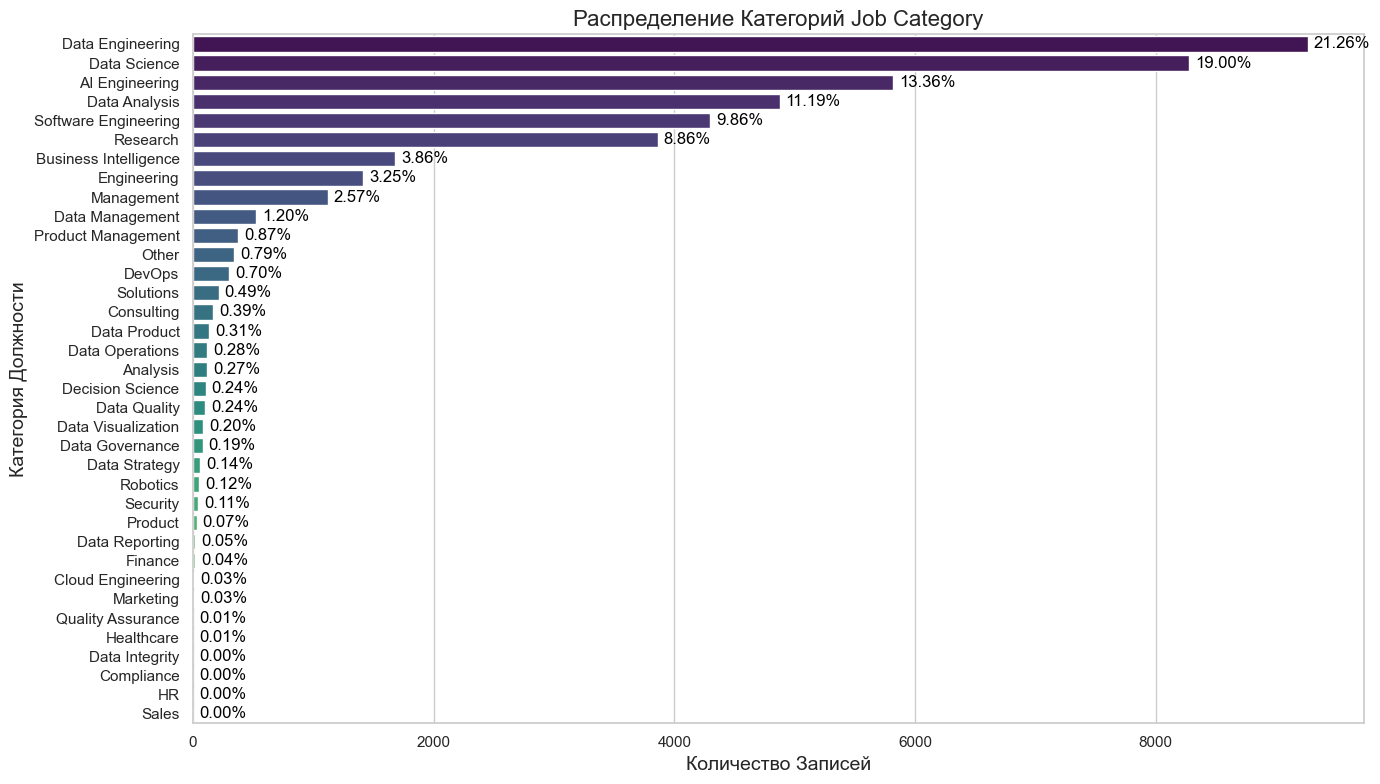

In [10]:
# Добавим визуализацию к распределению категорий

# Установка стиля графиков
sns.set(style="whitegrid")

# Создание DataFrame для визуализации
job_category_counts = df['job_category'].value_counts().reset_index()
job_category_counts.columns = ['job_category', 'count']

# Добавление столбца с процентным соотношением
job_category_counts['percentage'] = (job_category_counts['count'] / job_category_counts['count'].sum()) * 100

# Создание сортированного списка для более наглядного отображения
job_category_counts = job_category_counts.sort_values(by='count', ascending=False)

# Построение барчарта
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='count', y='job_category', data=job_category_counts, palette='viridis')

# Добавление процентных меток на барах
for index, row in job_category_counts.iterrows():
    bar_plot.text(row['count'] + 50, index, f"{row['percentage']:.2f}%", color='black', va="center")

plt.title('Распределение Категорий Job Category', fontsize=16)
plt.xlabel('Количество Записей', fontsize=14)
plt.ylabel('Категория Должности', fontsize=14)
plt.tight_layout()

# Сохранение графика
plt.savefig('job_category_distribution.png')
plt.show()


In [11]:
# Расчет распределения категорий
job_category_counts = df['job_category'].value_counts().reset_index()
job_category_counts.columns = ['job_category', 'count']
job_category_counts['percentage'] = (job_category_counts['count'] / job_category_counts['count'].sum()) * 100

# Отфильтровка категорий >1%
filtered_job_categories = job_category_counts[job_category_counts['percentage'] > 1]['job_category'].tolist()

# Создание нового DataFrame с отфильтрованными категориями
df_filtered = df[df['job_category'].isin(filtered_job_categories)].copy()

print(f"Количество уникальных категорий после фильтрации: {df_filtered['job_category'].nunique()}")
print(df_filtered['job_category'].value_counts())

Количество уникальных категорий после фильтрации: 10
job_category
Data Engineering         9264
Data Science             8278
AI Engineering           5821
Data Analysis            4875
Software Engineering     4296
Research                 3861
Business Intelligence    1681
Engineering              1414
Management               1120
Data Management           525
Name: count, dtype: int64


In [27]:
import re

# Функция для парсинга job_tags из текста
def parse_job_tags(file_path):
    job_tags_dict = {}
    current_category = None
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue  # Пропуск пустых строк
            # Определение, является ли строка названием категории
            if not re.search(r'\|', line):
                current_category = line
                job_tags_dict[current_category] = []
            else:
                # Извлечение тегов из строки
                tags = re.findall(r'([A-Za-z0-9\s&/]+) \| \d+ jobs', line)
                job_tags_dict[current_category].extend(tags)
    
    return job_tags_dict

# Парсинг файла job_tags.txt
job_tags_dict = parse_job_tags('job_tags_top_3.txt')

# Проверка полученного словаря
for category, tags in job_tags_dict.items():
    print(f"{category}: {tags[:5]}...")  # Печать первых 5 тегов каждой категории


Data Engineering: ['Engineering', ' Python', ' SQL']...
Data Science: ['Python', ' Machine Learning', ' Statistics']...
AI Engineering: ['Python', ' Machine Learning', ' Engineering']...
Data Analysis: ['SQL', ' Python', ' Data analysis']...
Software Engineering: ['Engineering', ' Python', ' Machine Learning']...
Research: ['Research', ' Machine Learning', ' Python']...
Business Intelligence: ['Business Intelligence', ' SQL', ' Python']...
Engineering: ['Engineering', ' Python', ' Machine Learning']...
Management: ['Engineering', ' Python', ' Machine Learning']...
Data Management: ['Data management', ' Excel', ' Data quality']...


In [29]:
# Создание колонки 'job_tags' на основе 'job_category'
df_filtered['job_tags'] = df_filtered['job_category'].apply(lambda x: ' '.join(job_tags_dict.get(x, [])))

# Просмотр первых нескольких записей
print(df_filtered[['job_category', 'job_tags']].head())


       job_category                               job_tags
0  Data Engineering               Engineering  Python  SQL
1    AI Engineering  Python  Machine Learning  Engineering
2    AI Engineering  Python  Machine Learning  Engineering
3    AI Engineering  Python  Machine Learning  Engineering
4    AI Engineering  Python  Machine Learning  Engineering


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Инициализация TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)  # Ограничение до 100 признаков для снижения размерности

# Применение TF-IDF к колонке 'job_tags'
tfidf_matrix = tfidf.fit_transform(df_filtered['job_tags'])

# Преобразование TF-IDF матрицы в DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out(), index=df_filtered.index)

# Просмотр первых нескольких строк TF-IDF DataFrame
print(tfidf_df.head())


   analysis  business  data  engineering  excel  intelligence  learning  \
0       0.0       0.0   0.0     0.594839    0.0           0.0  0.000000   
1       0.0       0.0   0.0     0.568406    0.0           0.0  0.525413   
2       0.0       0.0   0.0     0.568406    0.0           0.0  0.525413   
3       0.0       0.0   0.0     0.568406    0.0           0.0  0.525413   
4       0.0       0.0   0.0     0.568406    0.0           0.0  0.525413   

    machine  management    python  quality  research       sql  statistics  
0  0.000000         0.0  0.369695      0.0       0.0  0.713787         0.0  
1  0.525413         0.0  0.353267      0.0       0.0  0.000000         0.0  
2  0.525413         0.0  0.353267      0.0       0.0  0.000000         0.0  
3  0.525413         0.0  0.353267      0.0       0.0  0.000000         0.0  
4  0.525413         0.0  0.353267      0.0       0.0  0.000000         0.0  


In [31]:
# Объединение TF-IDF признаков с основным DataFrame
df_final = pd.concat([df_filtered, tfidf_df], axis=1)

# Удаление колонки 'job_tags', если она больше не нужна
df_final.drop('job_tags', axis=1, inplace=True)

# Просмотр первых нескольких строк итогового DataFrame
print(df_final.head())


   work_year experience_level employment_type                  job_title  \
0       2024               MI              FT          Big Data Engineer   
1       2024               SE              FT  Machine Learning Engineer   
2       2024               SE              FT  Machine Learning Engineer   
3       2024               SE              FT  Machine Learning Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   33600             EUR          37333                 GR            50   
1  410000             USD         410000                 US             0   
2  224000             USD         224000                 US             0   
3  305700             USD         305700                 US           100   
4  190300             USD         190300                 US           100   

  company_location  ... excel intelligence  learning   machine  management  \
0 

In [32]:
#сохранение признаков
import joblib
joblib.dump(tfidf, 'tfidf_top3_vectorizer.joblib')


['tfidf_top3_vectorizer.joblib']

### Пояснения к Полному Коду:

1.  **Фильтрация `job_category`:**

    -   Выбираются только те категории, которые составляют более 1% от общего числа записей.
    -   Создается новый DataFrame `df_filtered` с отфильтрованными записями.
2.  **Парсинг `job_tags`:**

    -   Функция `parse_job_tags` читает текстовый файл и создает словарь `job_tags_dict`, где ключами являются `job_category`, а значениями --- списки `job_tags`.
    -   Пример вывода показывает первые несколько тегов каждой категории для проверки корректности парсинга.
3.  **Назначение `job_tags`:**

    -   Для каждой записи на основе её `job_category` создается строка тегов, объединенная пробелами.
    -   Эта строка будет использоваться для TF-IDF кодирования.
4.  **Применение TF-IDF:**

    -   Инициализируется `TfidfVectorizer` с параметром `max_features=100` (можно настроить).
    -   Применяется `fit_transform` к колонке `job_tags`, создавая матрицу TF-IDF.
    -   Матрица преобразуется в DataFrame `tfidf_df` с именами признаков, соответствующими тегам.
5.  **Интеграция TF-IDF признаков:**

    -   Созданный `tfidf_df` объединяется с `df_filtered`, создавая итоговый DataFrame `df_final`.
    -   Колонка `job_tags` удаляется, так как ее информация уже представлена в виде TF-IDF признаков.

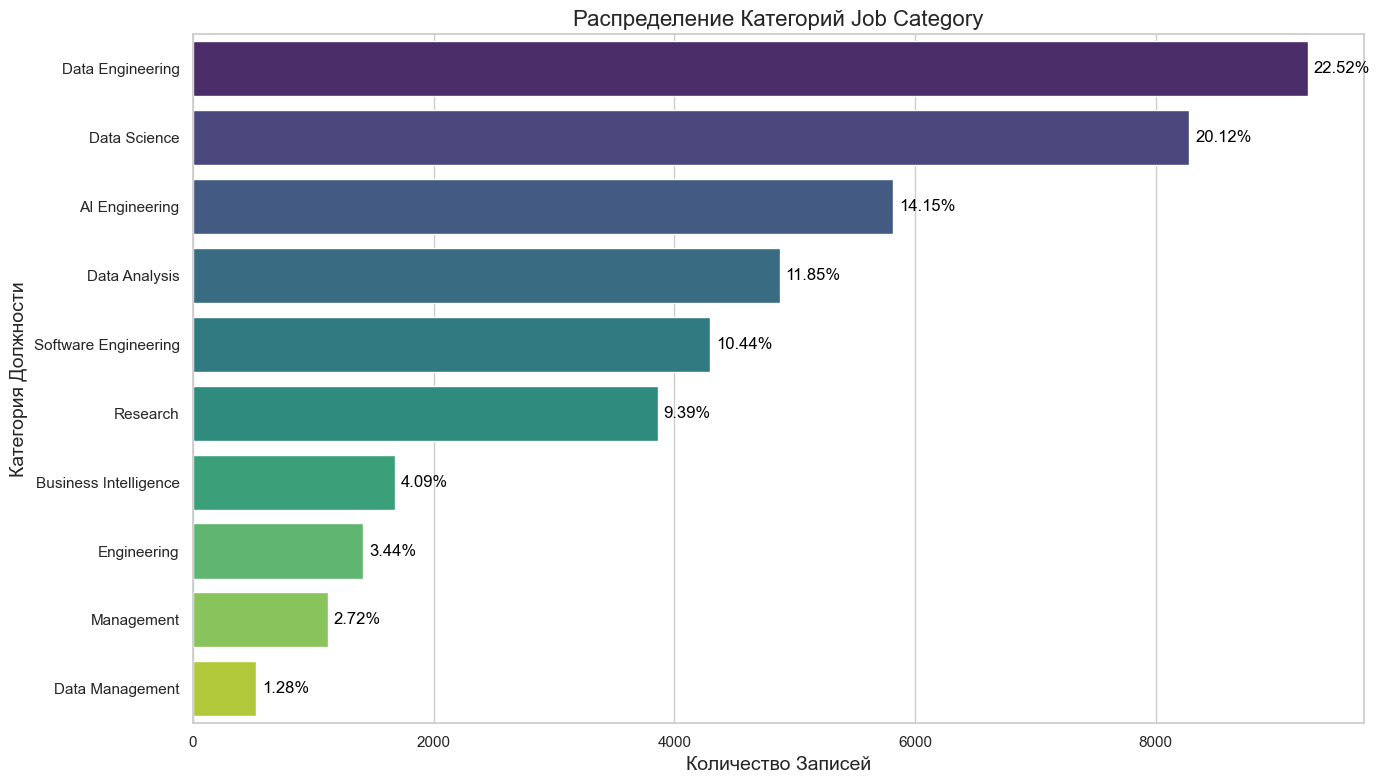

In [33]:
# Создание DataFrame для визуализации
job_category_viz = df_final['job_category'].value_counts().reset_index()
job_category_viz.columns = ['job_category', 'count']
job_category_viz['percentage'] = (job_category_viz['count'] / job_category_viz['count'].sum()) * 100

# Построение барчарта
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='count', y='job_category', data=job_category_viz, palette='viridis')

# Добавление процентных меток на барах
for index, row in job_category_viz.iterrows():
    bar_plot.text(row['count'] + 50, index, f"{row['percentage']:.2f}%", color='black', va="center")

plt.title('Распределение Категорий Job Category', fontsize=16)
plt.xlabel('Количество Записей', fontsize=14)
plt.ylabel('Категория Должности', fontsize=14)
plt.tight_layout()

# Сохранение графика
plt.savefig('job_category_distribution.png')
plt.show()

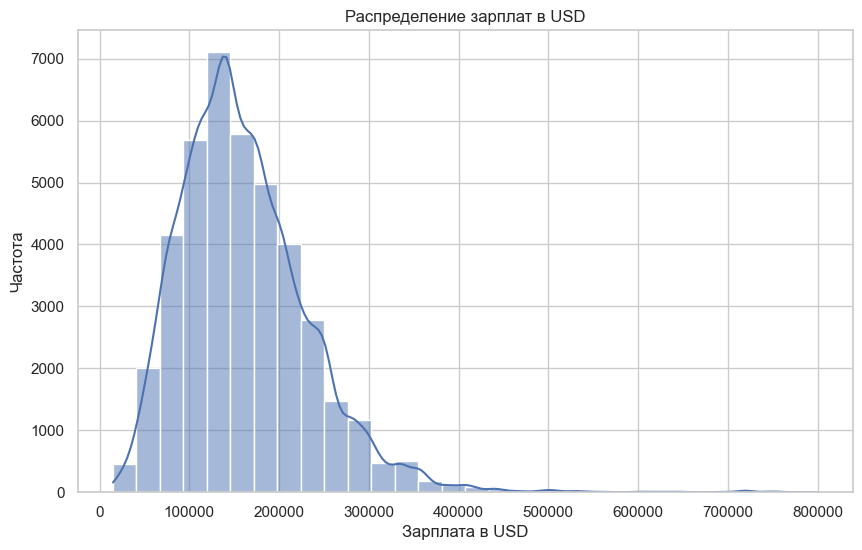

In [22]:
#посмотрим на другие признаки нашего датасета

#Распределение целевой переменной salary_in_usd

plt.figure(figsize=(10,6))
sns.histplot(df_final['salary_in_usd'], bins=30, kde=True)
plt.title('Распределение зарплат в USD')
plt.xlabel('Зарплата в USD')
plt.ylabel('Частота')
plt.show()


Распределение целевой переменной близко к нормальному. Выбросов практически нет.

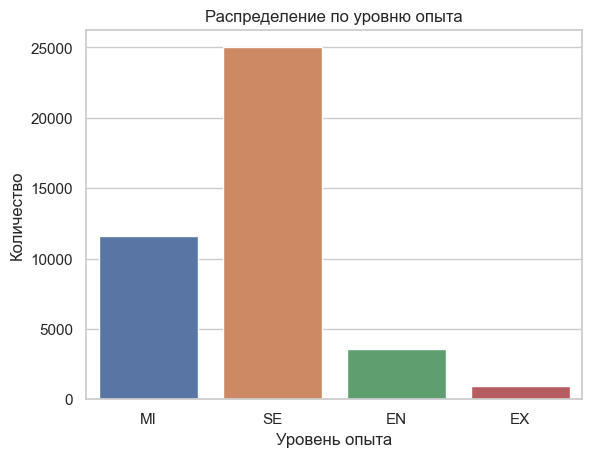

In [23]:
#Уровень опыта experience_level

sns.countplot(x='experience_level', data=df_final)
plt.title('Распределение по уровню опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Количество')
plt.show()

Уровень опыта преобладает SE и MI

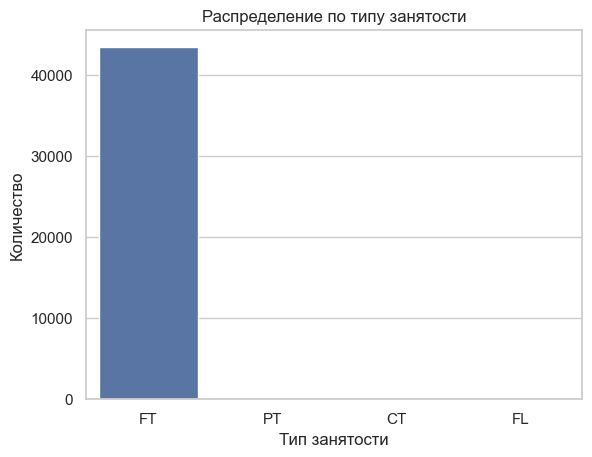

In [24]:
#Тип занятости employment_type

sns.countplot(x='employment_type', data=df)
plt.title('Распределение по типу занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Количество')
plt.show()

Тип занятости FT

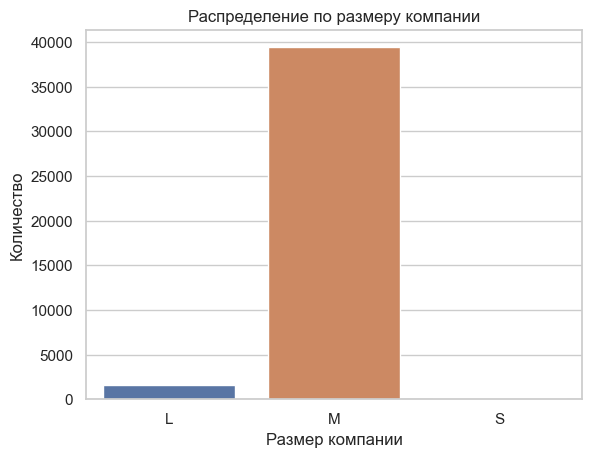

In [25]:
#Размер компании company_size

sns.countplot(x='company_size', data=df_final)
plt.title('Распределение по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Количество')
plt.show()

Подавляющее большинство имеет размер M

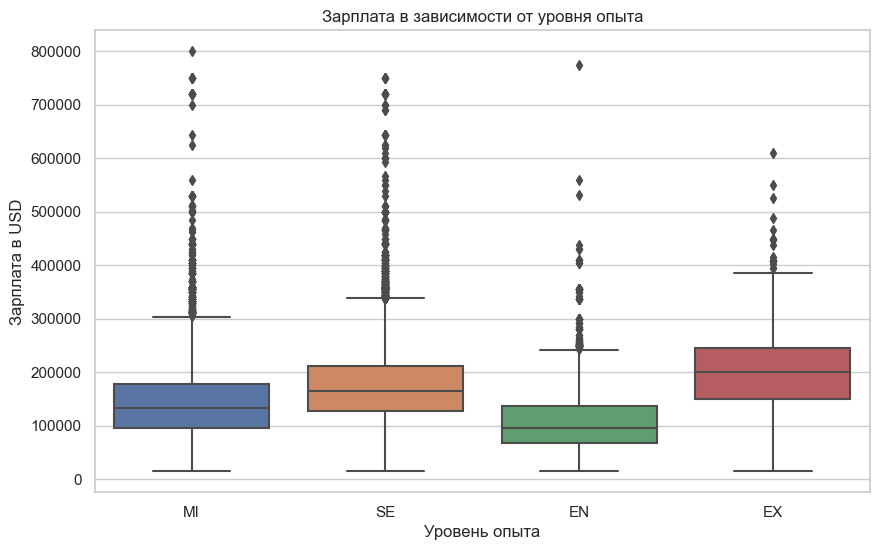

In [26]:
#Взаимосвязь между признаками и целевой переменной
#Зарплата в зависимости от уровня опыта

plt.figure(figsize=(10,6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_final)
plt.title('Зарплата в зависимости от уровня опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Зарплата в USD')
plt.show()

Видим, что уровень зарплат в среднем растёт в зависимости от уровня позиции.

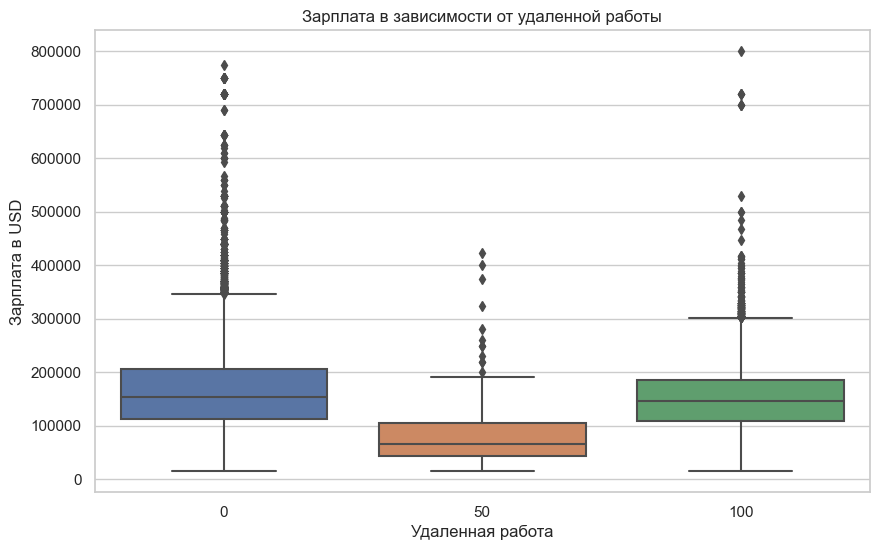

In [27]:
#Зарплата в зависимости от удаленной работы remote_ratio

plt.figure(figsize=(10,6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df_final)
plt.title('Зарплата в зависимости от удаленной работы')
plt.xlabel('Удаленная работа')
plt.ylabel('Зарплата в USD')
plt.show()

Видим, что есть сильная просадка в уровне зарплаты при частично удаленной. В сравнении без удаленной и полностью удаленной разницы нет.

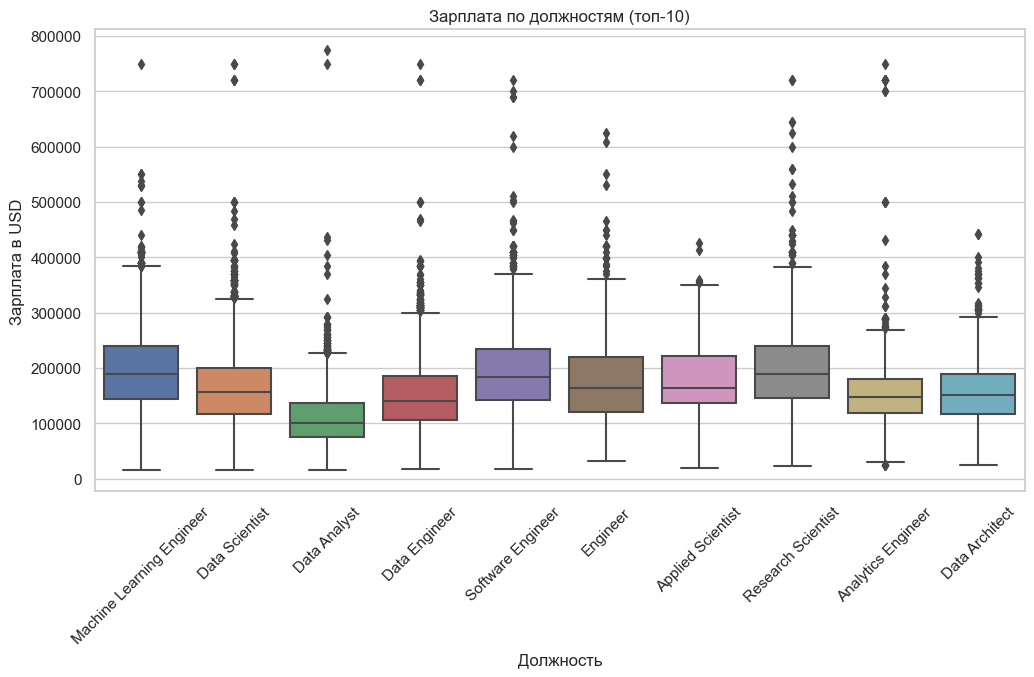

In [28]:
#Зарплата по должностям job_title

#Поскольку должностей много, можно вывести топ-10 наиболее популярных:

top_jobs = df_final['job_title'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='job_title', y='salary_in_usd', data=df_final[df_final['job_title'].isin(top_jobs)])
plt.title('Зарплата по должностям (топ-10)')
plt.xlabel('Должность')
plt.ylabel('Зарплата в USD')
plt.xticks(rotation=45)
plt.show()


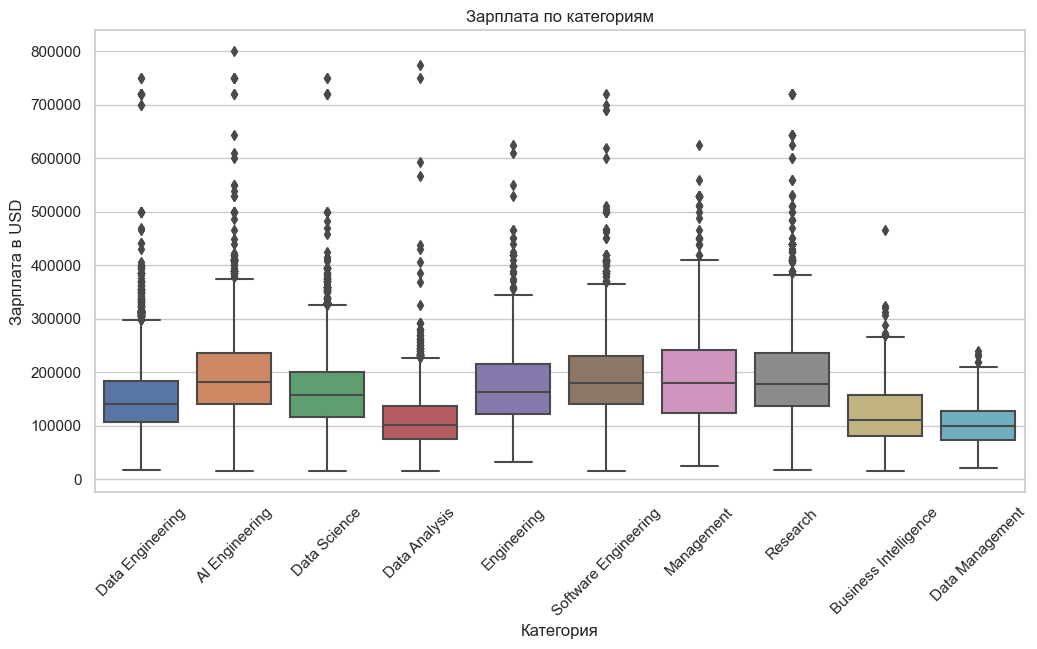

In [29]:
#Сравним теперь с категориями, которые мы оставили для анализа

plt.figure(figsize=(12,6))
sns.boxplot(x='job_category', y='salary_in_usd', data=df_final)
plt.title('Зарплата по категориям')
plt.xlabel('Категория')
plt.ylabel('Зарплата в USD')
plt.xticks(rotation=45)
plt.show()

Наблюдаем схожие распределения, что говорит о релевантном выборе категорий.

In [34]:
## 3.2.3 Применение Кодирования

import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# Определение колонок для кодирования
ohe_cols = ['experience_level', 'employment_type', 'company_size']
target_enc_cols = ['job_category', 'company_location', 'employee_residence']
numerical_cols = ['work_year', 'remote_ratio']

### One-Hot Encoding для низкой кардинальности
print(f"Колонки для One-Hot Encoding: {ohe_cols}")
df_ohe = pd.get_dummies(df_final[ohe_cols], drop_first=True).astype(int)
print(f"Количество признаков после OHE: {df_ohe.shape[1]}")

### Target Encoding для высококардинальных колонок
print(f"Колонки для Target Encoding: {target_enc_cols}")
target_encoder = ce.TargetEncoder(cols=target_enc_cols, smoothing=1.0)
df_target_enc = target_encoder.fit_transform(df_final[target_enc_cols], df_final['salary_in_usd'])
print(f"Количество признаков после Target Encoding: {df_target_enc.shape[1]}")

### Масштабирование Числовых Признаков
print(f"Масштабирование числовых колонок: {numerical_cols}")
scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])
print("Масштабирование числовых признаков завершено.")

#Переименуем TF-IDF признаки для лучшей читаемости
tfidf_cols = tfidf.get_feature_names_out().tolist()
df_final.rename(columns=lambda x: f"tfidf_{x}" if x in tfidf_cols else x, inplace=True)
tfidf_cols = [col for col in df_final.columns if col.startswith('tfidf_')]
# Проверка наличия TF-IDF колонок
print(f"Количество TF-IDF признаков: {len(tfidf_cols)}")
print(f"Примеры TF-IDF признаков: {tfidf_cols[:5]}")

### Объединение Всех Признаков

# Целевая переменная
y = df_final['salary_in_usd']

X = pd.concat([
    df_final[numerical_cols],
    df_ohe,
    df_target_enc,
    df_final[tfidf_cols]
], axis=1)

print(f"Общая размерность признаков после кодирования: {X.shape}")

Колонки для One-Hot Encoding: ['experience_level', 'employment_type', 'company_size']
Количество признаков после OHE: 8
Колонки для Target Encoding: ['job_category', 'company_location', 'employee_residence']
Количество признаков после Target Encoding: 3
Масштабирование числовых колонок: ['work_year', 'remote_ratio']
Масштабирование числовых признаков завершено.
Количество TF-IDF признаков: 14
Примеры TF-IDF признаков: ['tfidf_analysis', 'tfidf_business', 'tfidf_data', 'tfidf_engineering', 'tfidf_excel']
Общая размерность признаков после кодирования: (41135, 27)


In [39]:
## 3.2.4 Разделение на Обучающую и Тестовую Выборки

from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (32908, 27)
Размер тестовой выборки: (8227, 27)


In [40]:
# 3.3 Обучение моделей и подбор параметров

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Инициализация модели
lr = LinearRegression()

# Обучение модели
lr.fit(X_train, y_train)

# Предсказание
y_pred_lr = lr.predict(X_test)

# Оценка модели
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Линейная Регрессия:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")


Линейная Регрессия:
MAE: 46969.90
RMSE: 62690.73
R²: 0.25


### Цели:

1.  **Определить оптимальное значение `max_features`**, которое обеспечивает баланс между размерностью признаков и качеством модели.
2.  **Оценить влияние количества TF-IDF признаков** на производительность модели линейной регрессии.
3.  **Выбрать наилучшее значение `max_features`** на основе полученных результатов.

### Подход:

1.  **Определение диапазона `max_features`** для тестирования.
2.  **Построение модели** для каждого значения `max_features`.
3.  **Оценка производительности модели** по метрикам MAE, RMSE и R².
4.  **Анализ результатов** и выбор оптимального `max_features`.

### Шаги Реализации:

#### Шаг 1: Определение Диапазона `max_features`

Начнём с определения диапазона значений `max_features`, которые будем тестировать.

In [13]:
# Определение диапазона max_features для тестирования
max_features_options = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


#### Шаг 2: Подготовка Данных и Функция для Обучения и Оценки Модели

Создадим функцию, которая принимает `max_features`, выполняет TF-IDF кодирование, обучает модель линейной регрессии и возвращает метрики качества.

In [20]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

def evaluate_max_features(df_filtered, job_tags_file, max_features):
    """
    Функция для оценки производительности модели при заданном max_features.
    
    Параметры:
    - df_filtered: DataFrame с отфильтрованными job_category (>1%)
    - job_tags_file: путь к текстовому файлу с job_tags
    - max_features: максимальное количество признаков для TF-IDF
    
    Возвращает:
    - MAE, RMSE, R²
    """
    
    # Шаг 2.1: Парсинг job_tags из текстового файла
    def parse_job_tags(file_path):
        job_tags_dict = {}
        current_category = None
        
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                if not line:
                    continue  # Пропуск пустых строк
                # Определение, является ли строка названием категории
                if not re.search(r'\|', line):
                    current_category = line
                    job_tags_dict[current_category] = []
                else:
                    # Извлечение тегов из строки
                    tags = re.findall(r'([A-Za-z0-9\s&/]+) \| \d+ jobs', line)
                    job_tags_dict[current_category].extend(tags)
        
        return job_tags_dict
    
    job_tags_dict = parse_job_tags(job_tags_file)
    
    # Шаг 2.2: Назначение job_tags каждой записи на основе job_category
    df_filtered['job_tags'] = df_filtered['job_category'].apply(lambda x: ' '.join(job_tags_dict.get(x, [])))
    
    # Шаг 2.3: Применение TF-IDF кодирования
    tfidf = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = tfidf.fit_transform(df_filtered['job_tags'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out(), index=df_filtered.index)
    
    # Шаг 2.4: Интеграция TF-IDF признаков в DataFrame
    df_final = pd.concat([df_filtered, tfidf_df], axis=1)
    df_final.drop('job_tags', axis=1, inplace=True)
    
    # Шаг 2.5: Определение признаков и целевой переменной
    ohe_cols = ['experience_level', 'employment_type', 'company_size']
    target_enc_cols = ['job_category', 'company_location', 'employee_residence']
    numerical_cols = ['work_year', 'remote_ratio']
    
    # One-Hot Encoding для низкой кардинальности
    df_ohe = pd.get_dummies(df_final[ohe_cols], drop_first=True).astype(int)
    
    # Target Encoding для высококардинальных колонок
    target_encoder = ce.TargetEncoder(cols=target_enc_cols, smoothing=1.0)
    df_target_enc = target_encoder.fit_transform(df_final[target_enc_cols], df_final['salary_in_usd'])
    
    # Масштабирование числовых признаков
    scaler = StandardScaler()
    df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])
    
    # Определение признаков (X) и целевой переменной (y)
    X = pd.concat([
        df_final[numerical_cols],
        df_ohe,
        df_target_enc,
        df_final[tfidf.get_feature_names_out()]
    ], axis=1)
    y = df_final['salary_in_usd']
    
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Обучение модели линейной регрессии
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2


#### Шаг 3: Проведение Анализа для Разных Значений `max_features`

Теперь проведём цикл по различным значениям `max_features`, обучим модель для каждого из них и сохраним метрики качества.

In [21]:
# Путь к вашему файлу job_tags.txt
job_tags_file = 'job_tags_top_3.txt'

# Диапазон max_features для тестирования
max_features_options = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Список для сохранения результатов
results = []

for max_feat in max_features_options:
    mae, rmse, r2 = evaluate_max_features(df_filtered, job_tags_file, max_feat)
    results.append({
        'max_features': max_feat,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })
    print(f"max_features={max_feat}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}")


max_features=10: MAE=46969.90, RMSE=62690.73, R²=0.25
max_features=20: MAE=46969.90, RMSE=62690.73, R²=0.25
max_features=30: MAE=46969.90, RMSE=62690.73, R²=0.25
max_features=40: MAE=46969.90, RMSE=62690.73, R²=0.25
max_features=50: MAE=46969.90, RMSE=62690.73, R²=0.25
max_features=60: MAE=46969.90, RMSE=62690.73, R²=0.25
max_features=70: MAE=46969.90, RMSE=62690.73, R²=0.25
max_features=80: MAE=46969.90, RMSE=62690.73, R²=0.25
max_features=90: MAE=46969.90, RMSE=62690.73, R²=0.25
max_features=100: MAE=46969.90, RMSE=62690.73, R²=0.25


#### Шаг 4: Анализ Результатов

После выполнения цикла, создадим DataFrame с результатами и визуализируем, как меняется производительность модели в зависимости от `max_features`.

   max_features          MAE          RMSE        R2
0            10  46969.89626  62690.726901  0.248557
1            20  46969.89626  62690.726901  0.248557
2            30  46969.89626  62690.726901  0.248557
3            40  46969.89626  62690.726901  0.248557
4            50  46969.89626  62690.726901  0.248557
5            60  46969.89626  62690.726901  0.248557
6            70  46969.89626  62690.726901  0.248557
7            80  46969.89626  62690.726901  0.248557
8            90  46969.89626  62690.726901  0.248557
9           100  46969.89626  62690.726901  0.248557


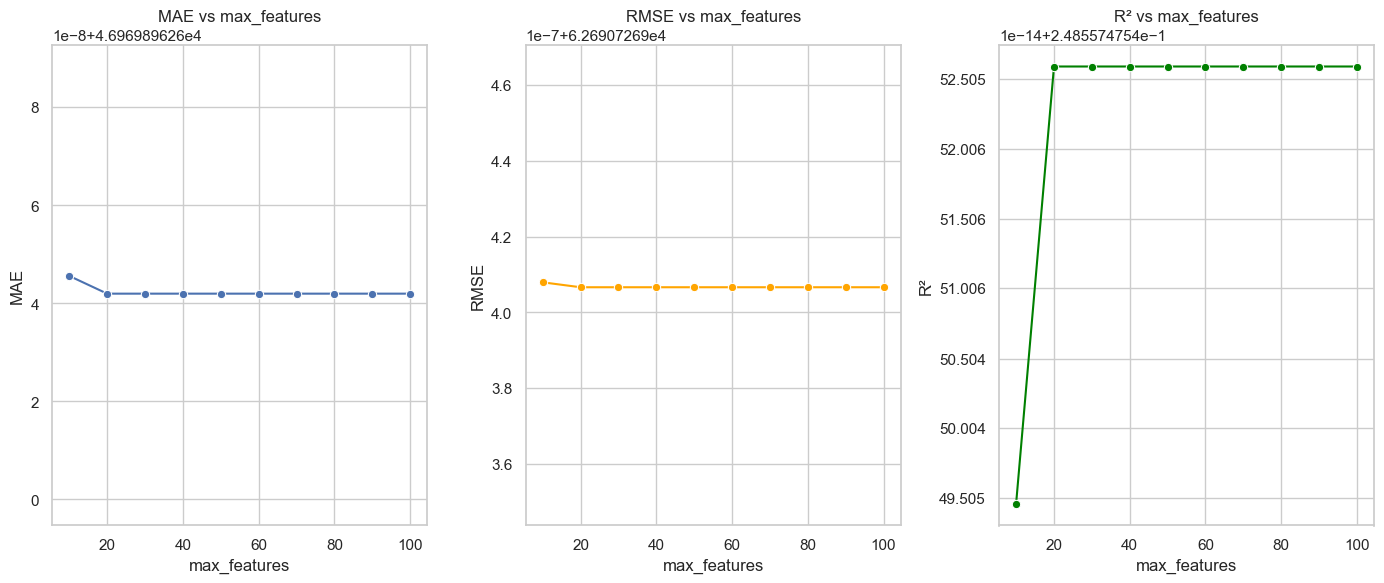

In [23]:
# Создание DataFrame с результатами
results_df = pd.DataFrame(results)

# Отображение результатов
print(results_df)

# Визуализация метрик в зависимости от max_features
plt.figure(figsize=(14, 6))

# MAE
plt.subplot(1, 3, 1)
sns.lineplot(x='max_features', y='MAE', data=results_df, marker='o')
plt.title('MAE vs max_features')
plt.xlabel('max_features')
plt.ylabel('MAE')

# RMSE
plt.subplot(1, 3, 2)
sns.lineplot(x='max_features', y='RMSE', data=results_df, marker='o', color='orange')
plt.title('RMSE vs max_features')
plt.xlabel('max_features')
plt.ylabel('RMSE')

# R²
plt.subplot(1, 3, 3)
sns.lineplot(x='max_features', y='R2', data=results_df, marker='o', color='green')
plt.title('R² vs max_features')
plt.xlabel('max_features')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


#### Шаг 5: Выбор Оптимального `max_features`

Проанализируем графики и выберем значение `max_features`, которое обеспечивает наилучшие показатели R² и при этом не приводит к чрезмерному увеличению размерности.

**Рекомендации:**

-   **Максимальное значение R²:** Выберем значение, при котором R² достигает своего максимума или стабилизируется.
-   **Минимальное значение RMSE и MAE:** Меньшие значения этих метрик указывают на лучшую точность модели.
-   **Баланс между размерностью и производительностью:** Если увеличение `max_features` приводит к незначительному улучшению R² или снижению RMSE/MAE, возможно, стоит выбрать более низкое значение для упрощения модели.

In [24]:
# Предположим, что оптимальное max_features=50
optimal_max_features = 50

# Повторное выполнение функции для оптимального max_features
mae_opt, rmse_opt, r2_opt = evaluate_max_features(df_filtered, job_tags_file, optimal_max_features)

print(f"Оптимальное max_features={optimal_max_features}: MAE={mae_opt:.2f}, RMSE={rmse_opt:.2f}, R²={r2_opt:.2f}")


Оптимальное max_features=50: MAE=46969.90, RMSE=62690.73, R²=0.25


In [41]:
# Извлечение коэффициентов модели
coefficients = pd.Series(lr.coef_, index=X.columns)

# Просмотр первых нескольких коэффициентов
print(coefficients.head())

work_year               2916.652066
remote_ratio           -3767.675932
experience_level_EX    78030.937084
experience_level_MI    18894.804055
experience_level_SE    46591.609123
dtype: float64


In [43]:
# Создание DataFrame с коэффициентами
coef_df = coefficients.reset_index()
coef_df.columns = ['feature', 'coefficient']

# Добавление столбца с абсолютным значением коэффициентов для сортировки
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

# Сортировка по убыванию абсолютного значения коэффициентов
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Просмотр первых 20 признаков с наибольшей важностью
print(coef_df_sorted.head(20))

                feature   coefficient  abs_coefficient
2   experience_level_EX  78030.937084     78030.937084
4   experience_level_SE  46591.609123     46591.609123
5    employment_type_FL -44806.523936     44806.523936
9        company_size_S -26660.596227     26660.596227
6    employment_type_FT  26247.015760     26247.015760
3   experience_level_MI  18894.804055     18894.804055
15           tfidf_data   9711.544997      9711.544997
13       tfidf_analysis   8463.864259      8463.864259
16    tfidf_engineering  -8206.716394      8206.716394
19       tfidf_learning  -6073.772034      6073.772034
20        tfidf_machine  -6073.772034      6073.772034
7    employment_type_PT  -4859.004068      4859.004068
8        company_size_M   4256.417429      4256.417429
24       tfidf_research  -4116.197060      4116.197060
1          remote_ratio  -3767.675932      3767.675932
22         tfidf_python  -3103.568076      3103.568076
0             work_year   2916.652066      2916.652066
14       t

In [45]:
# Выбор топ-20 признаков
top_n = 20
top_features = coef_df_sorted.head(top_n)

print(top_features)

                feature   coefficient  abs_coefficient
2   experience_level_EX  78030.937084     78030.937084
4   experience_level_SE  46591.609123     46591.609123
5    employment_type_FL -44806.523936     44806.523936
9        company_size_S -26660.596227     26660.596227
6    employment_type_FT  26247.015760     26247.015760
3   experience_level_MI  18894.804055     18894.804055
15           tfidf_data   9711.544997      9711.544997
13       tfidf_analysis   8463.864259      8463.864259
16    tfidf_engineering  -8206.716394      8206.716394
19       tfidf_learning  -6073.772034      6073.772034
20        tfidf_machine  -6073.772034      6073.772034
7    employment_type_PT  -4859.004068      4859.004068
8        company_size_M   4256.417429      4256.417429
24       tfidf_research  -4116.197060      4116.197060
1          remote_ratio  -3767.675932      3767.675932
22         tfidf_python  -3103.568076      3103.568076
0             work_year   2916.652066      2916.652066
14       t

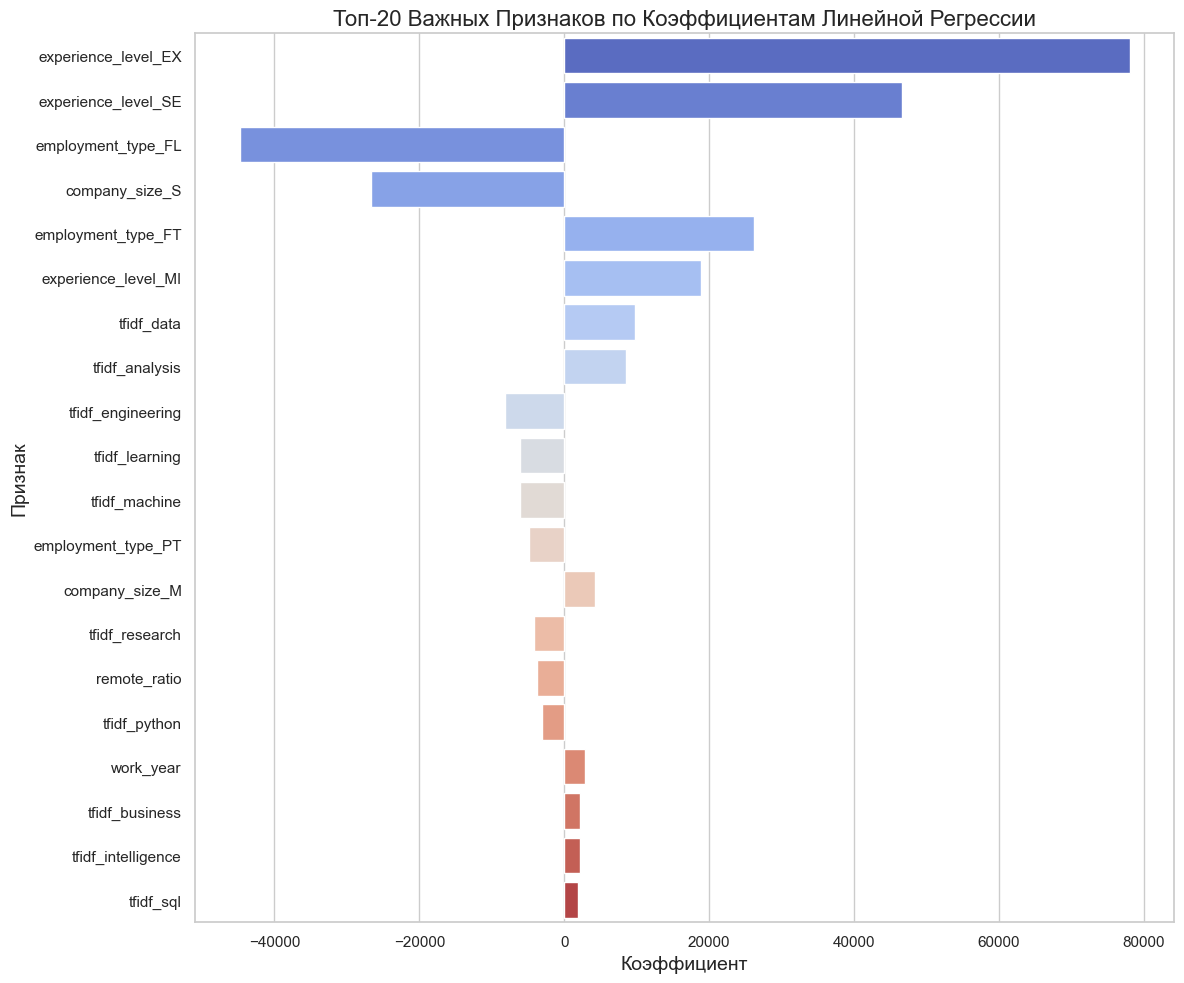

In [46]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Размер графика
plt.figure(figsize=(12, 10))

# Построение барчарта
sns.barplot(x='coefficient', y='feature', data=top_features, palette='coolwarm')

# Добавление заголовка и меток осей
plt.title('Топ-20 Важных Признаков по Коэффициентам Линейной Регрессии', fontsize=16)
plt.xlabel('Коэффициент', fontsize=14)
plt.ylabel('Признак', fontsize=14)

# Отображение графика
plt.tight_layout()
plt.show()


### Интерпретация Результатов

-   **Положительные Коэффициенты:** Признаки с положительными коэффициентами увеличивают предсказанную зарплату. Например, если `experience_level_EX` имеет высокий положительный коэффициент, это означает, что средний уровень опыта ассоциирован с более высокой зарплатой.

-   **Отрицательные Коэффициенты:** Признаки с отрицательными коэффициентами уменьшают предсказанную зарплату. Например, если признак `remote_ratio` имеет отрицательный коэффициент, это может указывать на то, что возможность удаленной работы ассоциирована с более низкой зарплатой.

-   **Масштабированные Числовые Признаки:** Так как числовые признаки были масштабированы, их коэффициенты отражают относительное влияние. Например, признак `work_year` имеет определенный коэффициент, указывающий на изменение зарплаты за каждый год опыта.

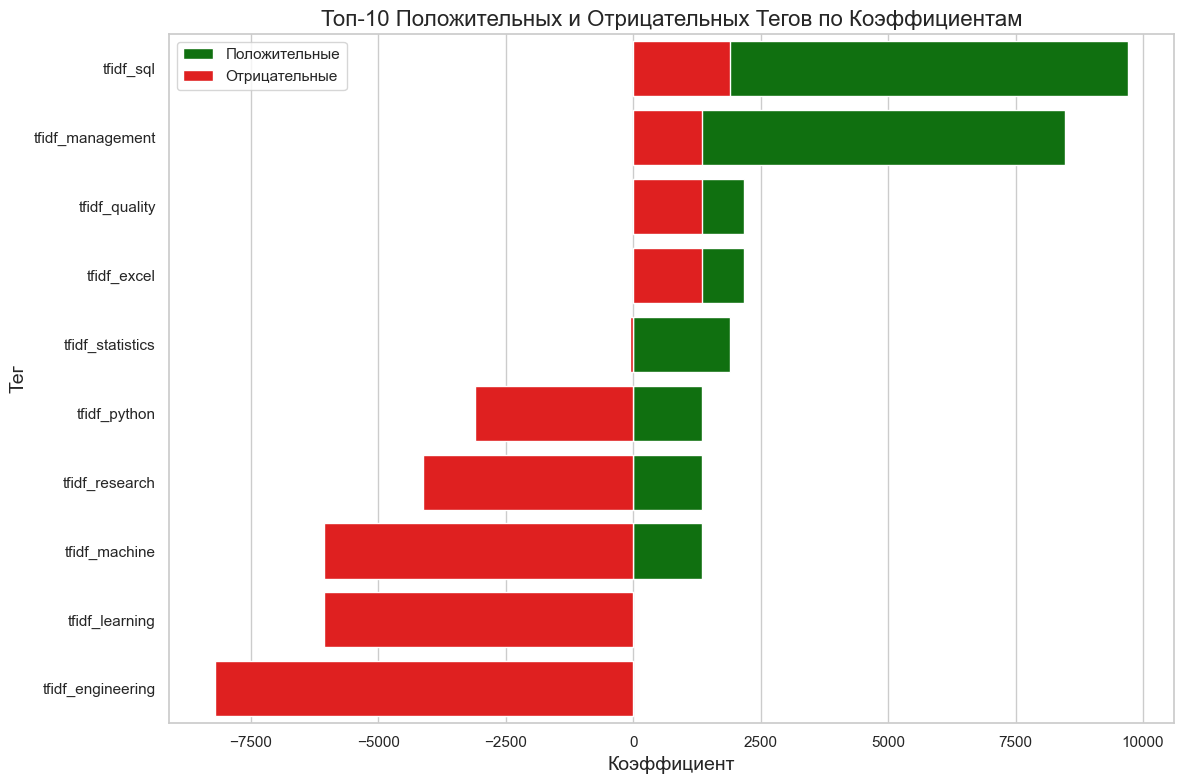

In [48]:
# Получение коэффициентов для TF-IDF признаков
tfidf_features = [col for col in df_final.columns if col.startswith('tfidf_')]
tfidf_coef = coefficients[tfidf_features].sort_values(ascending=False)

# Выбор топ-20 положительных и топ-10 отрицательных тегов
top_positive_tfidf = tfidf_coef.head(10)
top_negative_tfidf = tfidf_coef.tail(10)

# Визуализация
plt.figure(figsize=(12, 8))

# Топ-10 положительных
sns.barplot(x=top_positive_tfidf.values, y=top_positive_tfidf.index, color='green', label='Положительные')

# Топ-10 отрицательных
sns.barplot(x=top_negative_tfidf.values, y=top_negative_tfidf.index, color='red', label='Отрицательные')

plt.title('Топ-10 Положительных и Отрицательных Тегов по Коэффициентам', fontsize=16)
plt.xlabel('Коэффициент', fontsize=14)
plt.ylabel('Тег', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Добавление константы для расчета VIF
X_vif = X.copy()
X_vif['intercept'] = 1
 
# Расчет VIF для каждого признака
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


                feature        VIF
0             work_year   1.208502
1          remote_ratio   1.067858
2   experience_level_EX   1.283281
3   experience_level_MI   3.353398
4   experience_level_SE   3.564363
5    employment_type_FL   1.272012
6    employment_type_FT   2.331322
7    employment_type_PT   2.060167
8        company_size_M   1.239842
9        company_size_S   1.174464
10         job_category  97.605104
11     company_location  27.287827
12   employee_residence  27.434693
13       tfidf_analysis        inf
14       tfidf_business        inf
15           tfidf_data        inf
16    tfidf_engineering        inf
17          tfidf_excel        inf
18   tfidf_intelligence        inf
19       tfidf_learning        inf
20        tfidf_machine        inf
21     tfidf_management        inf
22         tfidf_python        inf
23        tfidf_quality        inf
24       tfidf_research        inf
25            tfidf_sql        inf
26     tfidf_statistics        inf
27            interc

In [50]:
# Шаг 1: Подготовка данных для расчёта VIF
# Добавление константы для расчёта VIF
X_vif = X.copy()
X_vif['intercept'] = 1  # Добавляем константу для корректного расчёта VIF

# Шаг 2: Расчет VIF для каждого признака
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

# Удаление колонки 'intercept', если она была добавлена только для расчёта VIF
vif_data = vif_data[vif_data['feature'] != 'intercept']

# Сортировка данных по убыванию VIF
vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Шаг 3: Классификация признаков по уровням мультиколлинеарности
# Определение категорий
no_multicollinearity = vif_data[vif_data['VIF'] < 5]['feature'].tolist()
moderate_multicollinearity = vif_data[(vif_data['VIF'] >= 5) & (vif_data['VIF'] <= 10)]['feature'].tolist()
high_multicollinearity = vif_data[vif_data['VIF'] > 10]['feature'].tolist()

# Шаг 4: Вывод результатов
print("Анализ мультиколлинеарности (VIF):\n")
print(vif_data)

print("\nКатегории признаков по уровням мультиколлинеарности:\n")

print(f"1. Признаки без существенной мультиколлинеарности (VIF < 5):\n{no_multicollinearity}\n")

print(f"2. Признаки с умеренной мультиколлинеарностью (5 ≤ VIF ≤ 10):\n{moderate_multicollinearity}\n")

print(f"3. Признаки с высокой мультиколлинеарностью (VIF > 10):\n{high_multicollinearity}\n")


Анализ мультиколлинеарности (VIF):

                feature        VIF
0        tfidf_analysis        inf
1        tfidf_business        inf
2             tfidf_sql        inf
3        tfidf_research        inf
4         tfidf_quality        inf
5          tfidf_python        inf
6      tfidf_management        inf
7         tfidf_machine        inf
8        tfidf_learning        inf
9    tfidf_intelligence        inf
10          tfidf_excel        inf
11    tfidf_engineering        inf
12           tfidf_data        inf
13     tfidf_statistics        inf
14         job_category  97.605104
15   employee_residence  27.434693
16     company_location  27.287827
17  experience_level_SE   3.564363
18  experience_level_MI   3.353398
19   employment_type_FT   2.331322
20   employment_type_PT   2.060167
21  experience_level_EX   1.283281
22   employment_type_FL   1.272012
23       company_size_M   1.239842
24            work_year   1.208502
25       company_size_S   1.174464
26         remote_r

In [51]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Регрессия R²: {r2_ridge:.2f}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Регрессия R²: {r2_lasso:.2f}")


Ridge Регрессия R²: 0.25
Lasso Регрессия R²: 0.25


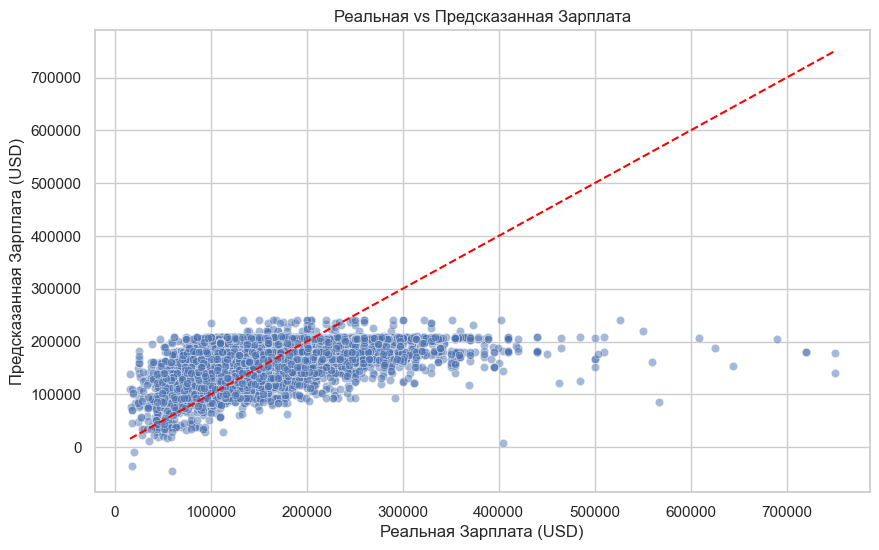

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.xlabel('Реальная Зарплата (USD)')
plt.ylabel('Предсказанная Зарплата (USD)')
plt.title('Реальная vs Предсказанная Зарплата')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

Random Forest Regressor:
R²: 0.27


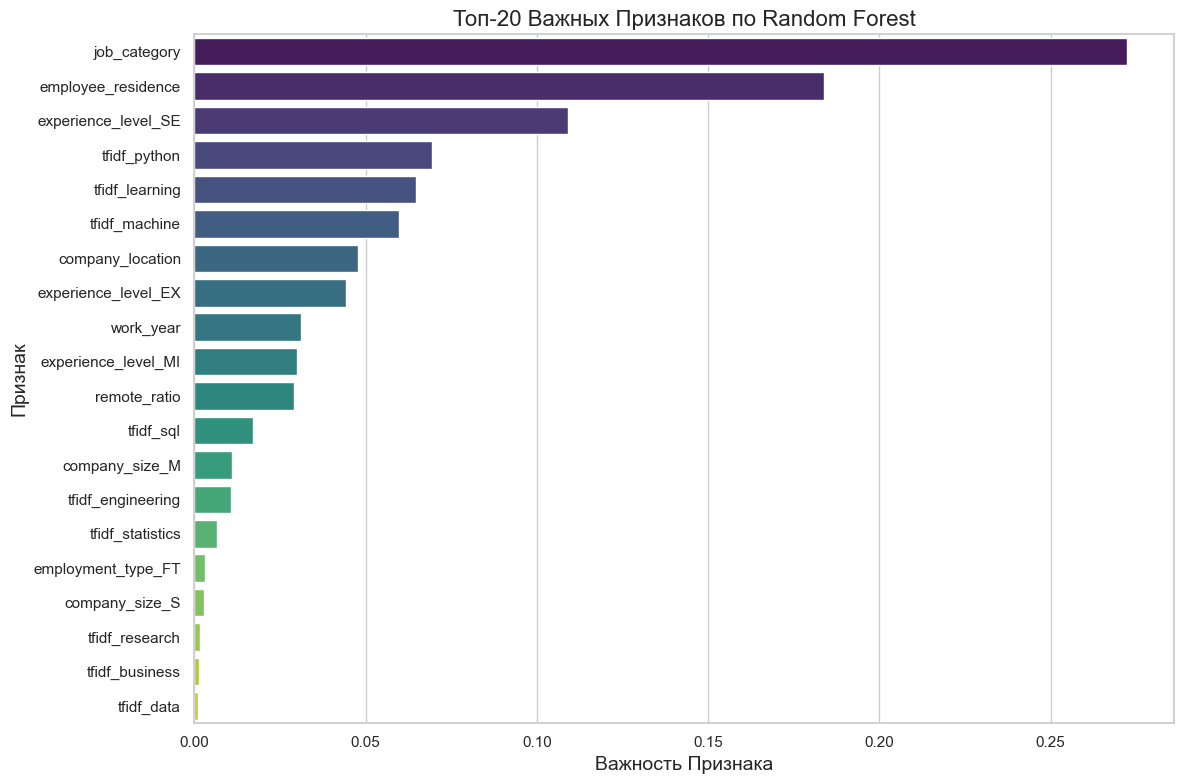

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor:")
print(f"R²: {r2_rf:.2f}")

# Получение важности признаков
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False).head(20)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_sorted.values, y=importances_sorted.index, palette='viridis')
plt.title('Топ-20 Важных Признаков по Random Forest', fontsize=16)
plt.xlabel('Важность Признака', fontsize=14)
plt.ylabel('Признак', fontsize=14)
plt.tight_layout()
plt.show()


In [53]:
# Инициализация модели
dt = DecisionTreeRegressor(random_state=42)

# Обучение модели
dt.fit(X_train, y_train)

# Предсказание
y_pred_dt = dt.predict(X_test)

# Оценка модели
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Регрессионное Дерево Решений:")
print(f"MAE: {mae_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R²: {r2_dt:.2f}")


Регрессионное Дерево Решений:
MAE: 46536.32
RMSE: 62265.85
R²: 0.26


In [54]:
# Инициализация модели
rf = RandomForestRegressor(random_state=42)

# Гиперпараметры для поиска
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Обучение модели
grid_search.fit(X_train, y_train)

# Лучшая модель
best_rf = grid_search.best_estimator_

# Предсказание
y_pred_rf = best_rf.predict(X_test)

# Оценка модели
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Случайный Лес (После Оптимизации):")
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Случайный Лес (После Оптимизации):
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
MAE: 46268.55
RMSE: 61816.50
R²: 0.27


In [55]:
# Создание DataFrame для сравнения
results = pd.DataFrame({
    'Модель': ['Линейная Регрессия', 'Регрессионное Дерево', 'Случайный Лес'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'R²': [r2_lr, r2_dt, r2_rf]
})

print(results)


                 Модель           MAE          RMSE        R²
0    Линейная Регрессия  46969.896260  62690.726901  0.248557
1  Регрессионное Дерево  46536.324294  62265.850267  0.258709
2         Случайный Лес  46268.546730  61816.499581  0.269369


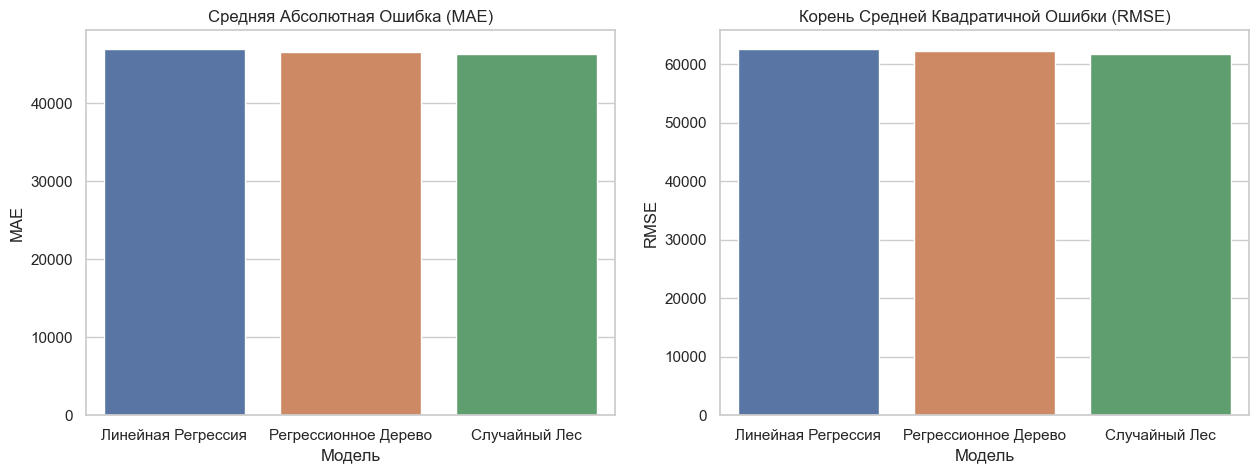

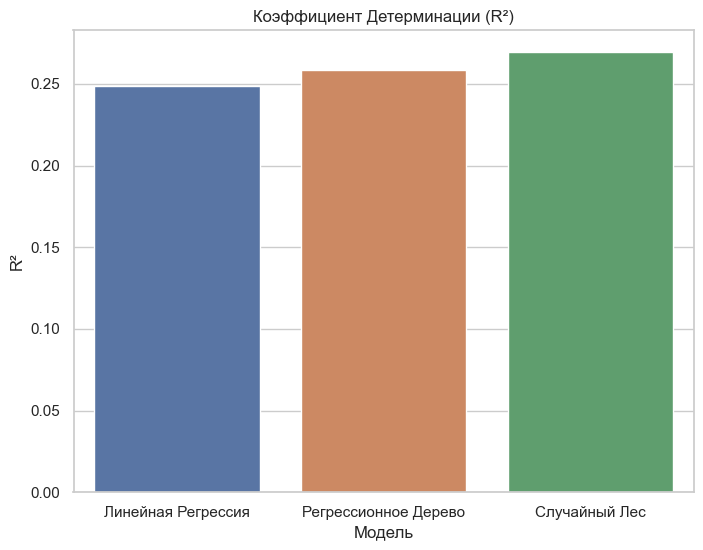

In [56]:
# Визуализация MAE и RMSE
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(x='Модель', y='MAE', data=results, ax=ax[0])
ax[0].set_title('Средняя Абсолютная Ошибка (MAE)')

sns.barplot(x='Модель', y='RMSE', data=results, ax=ax[1])
ax[1].set_title('Корень Средней Квадратичной Ошибки (RMSE)')

plt.show()

# Визуализация R²
plt.figure(figsize=(8,6))
sns.barplot(x='Модель', y='R²', data=results)
plt.title('Коэффициент Детерминации (R²)')
plt.show()


В результате анализа видим, что модель Случайного Леса с подбором гиперпаарметров показала лучшие результаты.

In [57]:
from catboost import CatBoostRegressor, Pool

# Инициализация базовой модели CatBoostRegressor
catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100  # Установите 100 для отображения прогресса каждые 100 итераций
)

# Обучение модели
catboost_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50  # Прекратить обучение, если метрика не улучшается за 50 итераций
)

# Предсказание на тестовой выборке
y_pred = catboost_model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\nБазовая CatBoostRegressor:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


0:	learn: 71234.8142839	test: 70674.2329681	best: 70674.2329681 (0)	total: 156ms	remaining: 2m 35s
100:	learn: 61992.7700081	test: 61934.2046954	best: 61934.2046954 (100)	total: 816ms	remaining: 7.26s
200:	learn: 61694.3521977	test: 61792.5498172	best: 61790.9179884 (190)	total: 1.5s	remaining: 5.97s
300:	learn: 61563.0362890	test: 61780.7817478	best: 61777.0495358 (269)	total: 2.28s	remaining: 5.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 61774.82988
bestIteration = 320

Shrink model to first 321 iterations.

Базовая CatBoostRegressor:
MAE: 46243.55
RMSE: 61774.83
R²: 0.27


In [58]:
# Определение пространства гиперпараметров для RandomizedSearchCV
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'iterations': [500, 1000, 1500, 2000],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128, 256],
    'bagging_temperature': [0, 0.5, 1],
    'random_strength': [0, 0.5, 1],
    'subsample': [0.5, 0.7, 0.9, 1.0]
}


In [59]:
# Инициализация модели CatBoostRegressor без указания параметров
catboost = CatBoostRegressor(
    eval_metric='RMSE',
    random_seed=42,
    verbose=0  # Отключаем вывод прогресса для ускорения процесса
)


In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=param_dist,
    n_iter=50,  # Количество комбинаций параметров для проверки
    scoring='neg_root_mean_squared_error',  # Метрика для оценки
    cv=3,  # Количество фолдов кросс-валидации
    verbose=1,
    random_state=42,
    n_jobs=-1  # Использовать все доступные ядра
)


In [61]:
# Обучение RandomizedSearchCV
random_search.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
)

# Вывод лучших параметров
print("\nЛучшие параметры после RandomizedSearchCV:")
print(random_search.best_params_)

# Вывод лучшей оценки
print(f"Лучшая RMSE: {-random_search.best_score_:.2f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits

Лучшие параметры после RandomizedSearchCV:
{'subsample': 0.9, 'random_strength': 0.5, 'learning_rate': 0.3, 'l2_leaf_reg': 9, 'iterations': 1000, 'depth': 6, 'border_count': 128, 'bagging_temperature': 0}
Лучшая RMSE: 62153.89


In [62]:
# Извлечение лучших параметров
best_params = random_search.best_params_

# Инициализация модели с лучшими параметрами
best_catboost = CatBoostRegressor(
    **best_params,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100  # Устанавливаем для отображения прогресса
)

# Обучение модели на обучающей выборке
best_catboost.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
)

# Предсказание на тестовой выборке
y_pred_best = best_catboost.predict(X_test)

# Оценка модели
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print("\nОптимизированный CatBoostRegressor:")
print(f"MAE: {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.2f}")


0:	learn: 68357.3750630	test: 67857.0241220	best: 67857.0241220 (0)	total: 7.86ms	remaining: 7.85s
100:	learn: 61656.7053243	test: 61830.6011569	best: 61828.0922244 (97)	total: 493ms	remaining: 4.38s
200:	learn: 61480.0305409	test: 61809.8935999	best: 61806.8330547 (183)	total: 977ms	remaining: 3.88s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 61806.83305
bestIteration = 183

Shrink model to first 184 iterations.

Оптимизированный CatBoostRegressor:
MAE: 46249.84
RMSE: 61806.83
R²: 0.27


In [64]:
print(feature_importances.columns)


Index(['Feature Id', 'Importances'], dtype='object')


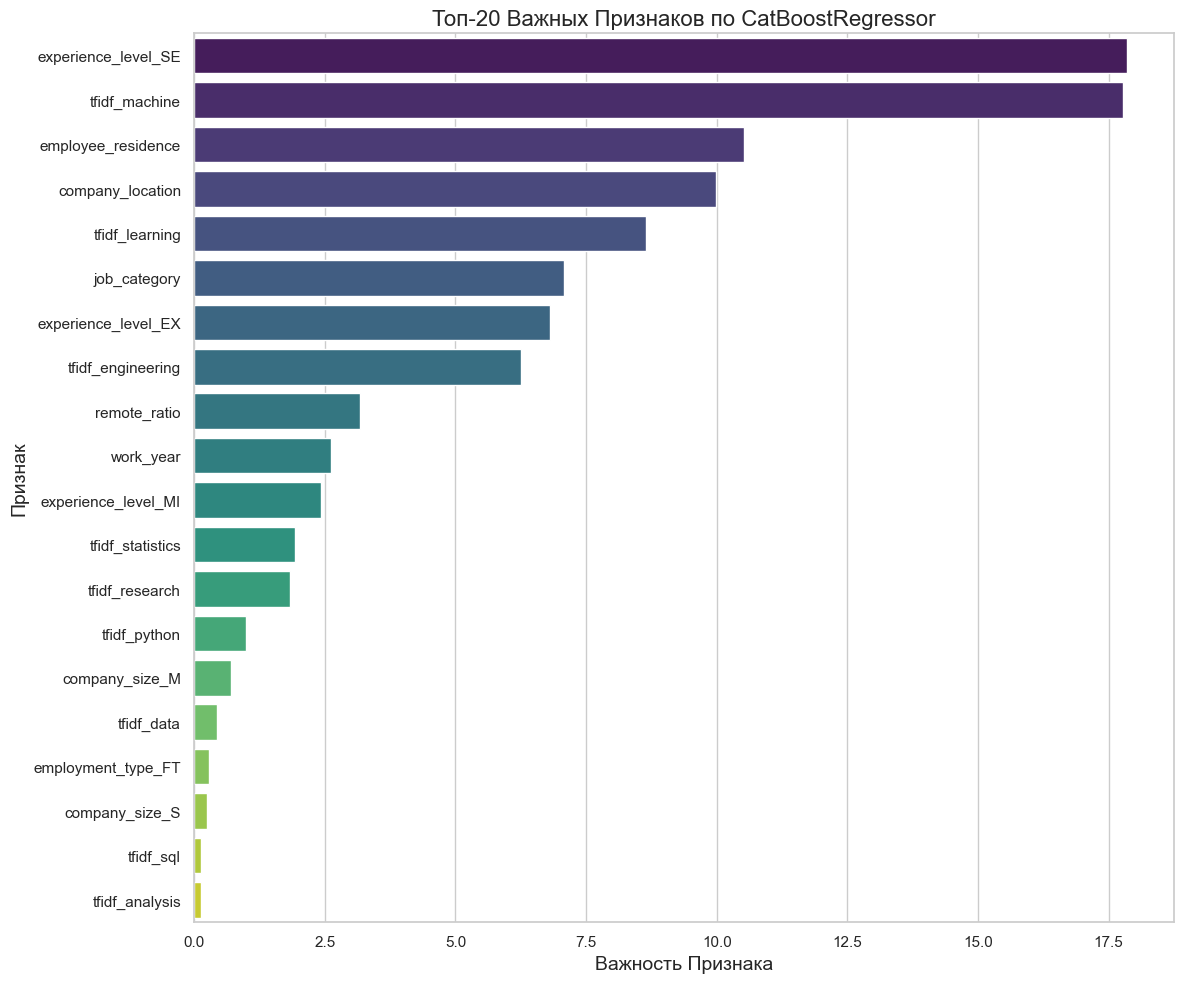

In [65]:
# Получение важности признаков
feature_importances = best_catboost.get_feature_importance(prettified=True)

# Отображение топ-20 наиболее важных признаков
plt.figure(figsize=(12, 10))
sns.barplot(
    x='Importances',
    y='Feature Id',
    data=feature_importances.head(20),
    palette='viridis'
)
plt.title('Топ-20 Важных Признаков по CatBoostRegressor', fontsize=16)
plt.xlabel('Важность Признака', fontsize=14)
plt.ylabel('Признак', fontsize=14)
plt.tight_layout()
plt.show()


In [66]:
# Определение выбросов с использованием IQR
Q1 = df_final['salary_in_usd'].quantile(0.25)
Q3 = df_final['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов
df_final = df_final[~((df_final['salary_in_usd'] < (Q1 - 1.5 * IQR)) | (df_final['salary_in_usd'] > (Q3 + 1.5 * IQR)))]


In [67]:
# Применение логарифмической трансформации
df_final['log_salary'] = np.log1p(df_final['salary_in_usd'])

In [68]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_catboost, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
print(f"Среднее CV RMSE: {-cv_scores.mean():.2f}")
print(f"Стандартное отклонение CV RMSE: {cv_scores.std():.2f}")


Среднее CV RMSE: 63382.17
Стандартное отклонение CV RMSE: 6135.23


In [110]:
## 3.2.3 Применение Кодирования

import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# Определение колонок для кодирования
ohe_cols = ['experience_level', 'employment_type', 'company_size']
target_enc_cols = ['job_category', 'company_location', 'employee_residence']
numerical_cols = ['work_year', 'remote_ratio']

### One-Hot Encoding для низкой кардинальности
print(f"Колонки для One-Hot Encoding: {ohe_cols}")
df_ohe = pd.get_dummies(df_final[ohe_cols], drop_first=True).astype(int)
print(f"Количество признаков после OHE: {df_ohe.shape[1]}")

### Target Encoding для высококардинальных колонок
print(f"Колонки для Target Encoding: {target_enc_cols}")
target_encoder = ce.TargetEncoder(cols=target_enc_cols, smoothing=1.0)
df_target_enc = target_encoder.fit_transform(df_final[target_enc_cols], df_final['salary_in_usd'])
print(f"Количество признаков после Target Encoding: {df_target_enc.shape[1]}")

### Масштабирование Числовых Признаков
print(f"Масштабирование числовых колонок: {numerical_cols}")
scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])
print("Масштабирование числовых признаков завершено.")

#Переименуем TF-IDF признаки для лучшей читаемости
tfidf_cols = tfidf.get_feature_names_out().tolist()
df_final.rename(columns=lambda x: f"tfidf_{x}" if x in tfidf_cols else x, inplace=True)
tfidf_cols = [col for col in df_final.columns if col.startswith('tfidf_')]
# Проверка наличия TF-IDF колонок
print(f"Количество TF-IDF признаков: {len(tfidf_cols)}")
print(f"Примеры TF-IDF признаков: {tfidf_cols[:5]}")

### Объединение Всех Признаков

# Целевая переменная
y = df_final['log_salary']

X = pd.concat([
    df_final[numerical_cols],
    df_ohe,
    df_target_enc,
    df_final[tfidf_cols]
], axis=1)

print(f"Общая размерность признаков после кодирования: {X.shape}")

Колонки для One-Hot Encoding: ['experience_level', 'employment_type', 'company_size']
Количество признаков после OHE: 8
Колонки для Target Encoding: ['job_category', 'company_location', 'employee_residence']
Количество признаков после Target Encoding: 3
Масштабирование числовых колонок: ['work_year', 'remote_ratio']
Масштабирование числовых признаков завершено.
Количество TF-IDF признаков: 14
Примеры TF-IDF признаков: ['tfidf_analysis', 'tfidf_business', 'tfidf_data', 'tfidf_engineering', 'tfidf_excel']
Общая размерность признаков после кодирования: (40193, 27)


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [112]:
from catboost import CatBoostRegressor

# Инициализация модели с лучшими параметрами
best_catboost = CatBoostRegressor(
    **best_params,  # Лучшие параметры из RandomizedSearchCV
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

# Обучение модели
best_catboost.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
)

# Предсказание
y_pred_best = best_catboost.predict(X_test)

# Обратная трансформация для интерпретации
y_pred_best_exp = np.expm1(y_pred_best)
y_test_exp = np.expm1(y_test)

# Оценка модели
mae_best = mean_absolute_error(y_test_exp, y_pred_best_exp)
rmse_best = mean_squared_error(y_test_exp, y_pred_best_exp, squared=False)
r2_best = r2_score(y_test_exp, y_pred_best_exp)

print("\nОптимизированный CatBoostRegressor после трансформации целевой переменной:")
print(f"MAE: {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.2f}")


0:	learn: 0.4089536	test: 0.4162111	best: 0.4162111 (0)	total: 6.76ms	remaining: 6.76s
100:	learn: 0.3422756	test: 0.3554514	best: 0.3554380 (99)	total: 524ms	remaining: 4.66s
200:	learn: 0.3396324	test: 0.3552759	best: 0.3550394 (160)	total: 1.01s	remaining: 4.03s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3550393932
bestIteration = 160

Shrink model to first 161 iterations.

Оптимизированный CatBoostRegressor после трансформации целевой переменной:
MAE: 41804.34
RMSE: 53538.65
R²: 0.28


Названия столбцов в feature_importances:
Index(['Feature Id', 'Importances'], dtype='object')


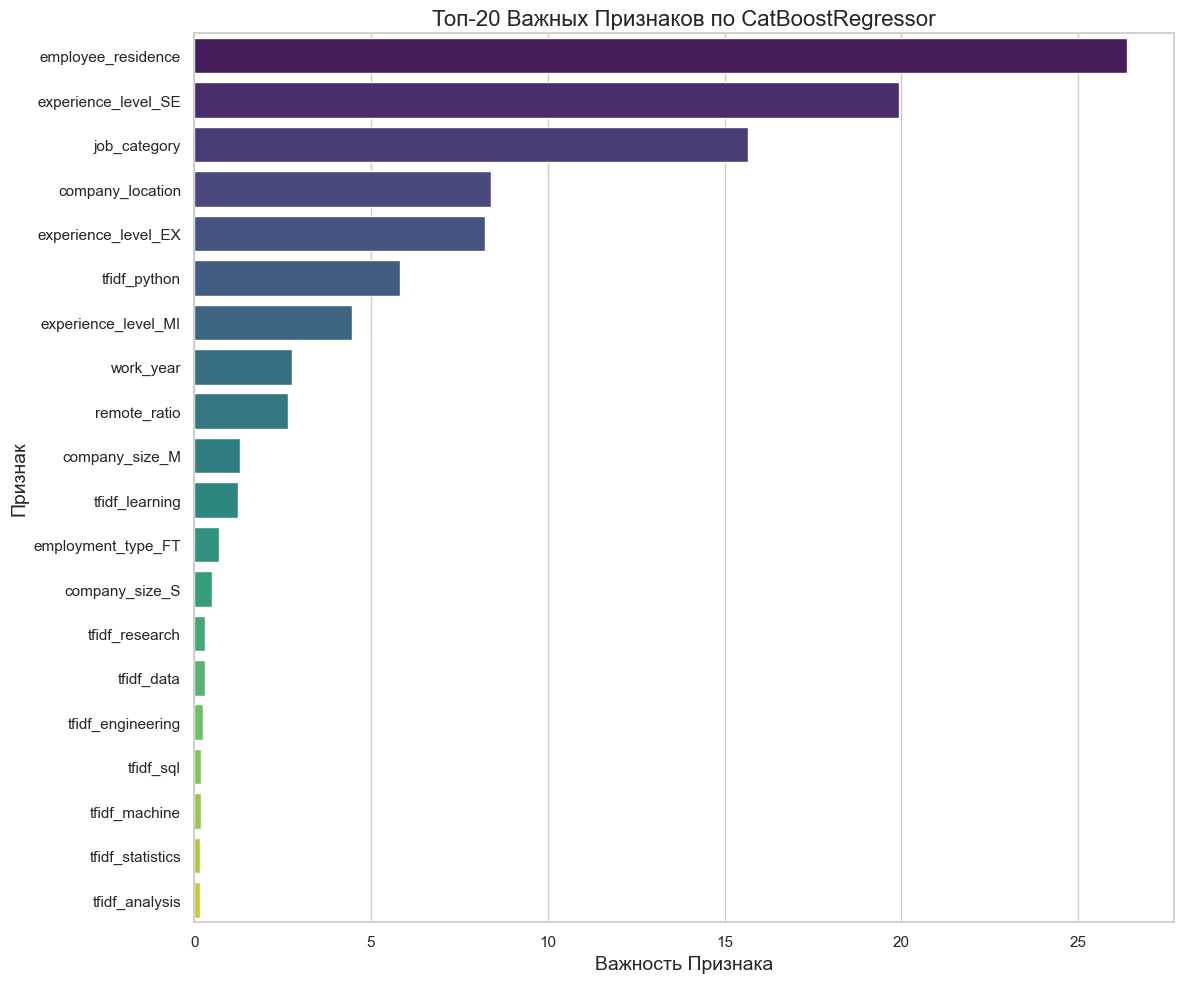

In [73]:
# Получение важности признаков
feature_importances = best_catboost.get_feature_importance(prettified=True)

# Проверка названий столбцов
print("Названия столбцов в feature_importances:")
print(feature_importances.columns)

# Отображение топ-20 наиболее важных признаков
plt.figure(figsize=(12, 10))
sns.barplot(
    x='Importances',
    y='Feature Id',
    data=feature_importances.head(20),
    palette='viridis'
)
plt.title('Топ-20 Важных Признаков по CatBoostRegressor', fontsize=16)
plt.xlabel('Важность Признака', fontsize=14)
plt.ylabel('Признак', fontsize=14)
plt.tight_layout()
plt.show()


In [75]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 259.2 kB/s eta 0:08:02
   ---------------------------------------- 0.1/124.9 MB 363.1 kB/s eta 0:05:44
   ---------------------------------------- 0.1/124.9 MB 595.3 kB/s eta 0:03:30
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 0.4/124.9 MB 1.3 MB/s eta 0:01:33
   ---------------------------------------- 0.6/124.9 MB 1.6 MB/s eta 0:01:16
   ---------------------------------------- 0.9/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------

   -------------------------------------- - 119.1/124.9 MB 2.7 MB/s eta 0:00:03
   -------------------------------------- - 119.2/124.9 MB 2.7 MB/s eta 0:00:03
   -------------------------------------- - 119.4/124.9 MB 2.7 MB/s eta 0:00:03
   -------------------------------------- - 119.5/124.9 MB 2.7 MB/s eta 0:00:03
   -------------------------------------- - 119.6/124.9 MB 2.7 MB/s eta 0:00:02
   -------------------------------------- - 119.8/124.9 MB 2.7 MB/s eta 0:00:02
   -------------------------------------- - 119.9/124.9 MB 2.7 MB/s eta 0:00:02
   -------------------------------------- - 120.0/124.9 MB 2.7 MB/s eta 0:00:02
   -------------------------------------- - 120.2/124.9 MB 2.7 MB/s eta 0:00:02
   -------------------------------------- - 120.3/124.9 MB 2.7 MB/s eta 0:00:02
   -------------------------------------- - 120.4/124.9 MB 2.7 MB/s eta 0:00:02
   -------------------------------------- - 120.6/124.9 MB 2.7 MB/s eta 0:00:02
   -------------------------------------

In [79]:
import xgboost as xgb

# Инициализация модели XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42
)

# Обучение модели
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

# Предсказание
y_pred_xgb = xgb_model.predict(X_test)

# Обратная трансформация
y_pred_xgb_exp = np.expm1(y_pred_xgb)
y_test_exp = np.expm1(y_test)

# Оценка модели
mae_xgb = mean_absolute_error(y_test_exp, y_pred_xgb_exp)
rmse_xgb = mean_squared_error(y_test_exp, y_pred_xgb_exp, squared=False)
r2_xgb = r2_score(y_test_exp, y_pred_xgb_exp)

print("\nXGBoost Regressor после трансформации целевой переменной:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.2f}")


[0]	validation_0-rmse:0.44786
[100]	validation_0-rmse:0.35495
[200]	validation_0-rmse:0.35405
[300]	validation_0-rmse:0.35427
[400]	validation_0-rmse:0.35448
[500]	validation_0-rmse:0.35478
[600]	validation_0-rmse:0.35500
[700]	validation_0-rmse:0.35528
[800]	validation_0-rmse:0.35540
[900]	validation_0-rmse:0.35547
[999]	validation_0-rmse:0.35564

XGBoost Regressor после трансформации целевой переменной:
MAE: 41774.66
RMSE: 53468.59
R²: 0.28


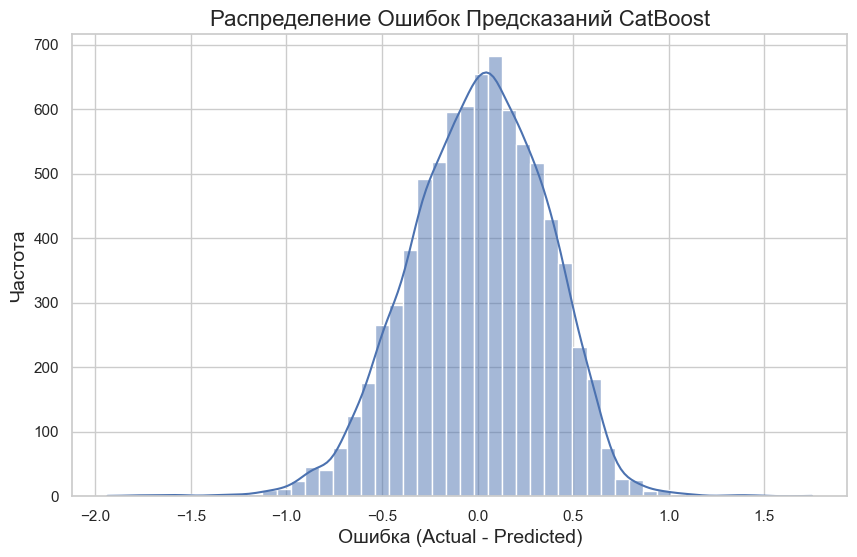

In [80]:
errors = y_test - y_pred_best  # Для CatBoost
plt.figure(figsize=(10,6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Распределение Ошибок Предсказаний CatBoost', fontsize=16)
plt.xlabel('Ошибка (Actual - Predicted)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()


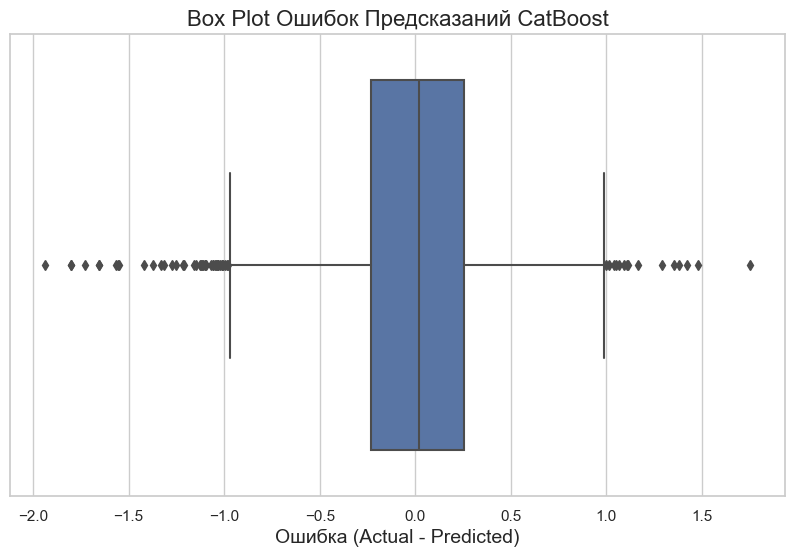

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(x=errors)
plt.title('Box Plot Ошибок Предсказаний CatBoost', fontsize=16)
plt.xlabel('Ошибка (Actual - Predicted)', fontsize=14)
plt.show()


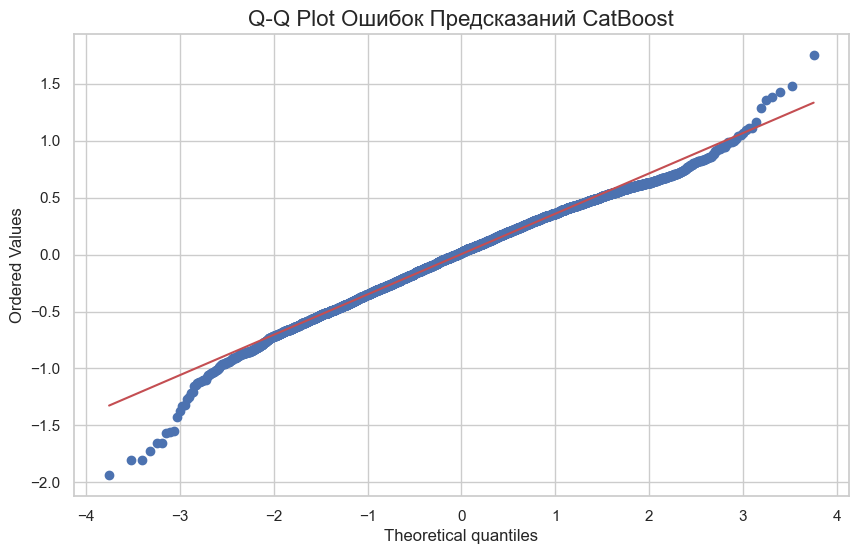

In [82]:
#Для проверки нормальности распределения ошибок.

import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(errors, dist="norm", plot=plt)
plt.title('Q-Q Plot Ошибок Предсказаний CatBoost', fontsize=16)
plt.show()


In [83]:
pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
    --------------------------------------- 10.2/456.1 kB ? eta -:--:--
   ----- --------------------------------- 61.4/456.1 kB 812.7 kB/s eta 0:00:01
   --------------- ------------------------ 174.1/456.1 kB 1.5 MB/s eta 0:00:01
   --------------------------- ------------ 317.4/456.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [84]:
import shap

# Создание объекта объяснителя
explainer = shap.Explainer(best_catboost)

# Вычисление SHAP-значений для тестовой выборки
shap_values = explainer(X_test)


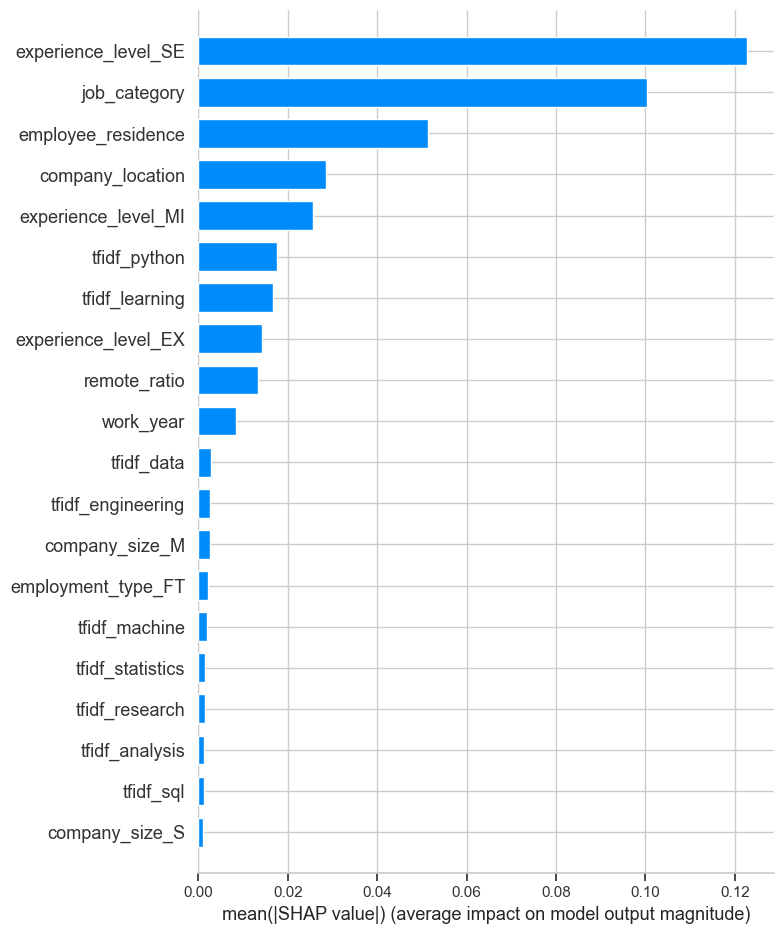

In [85]:
# Важность признаков
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)


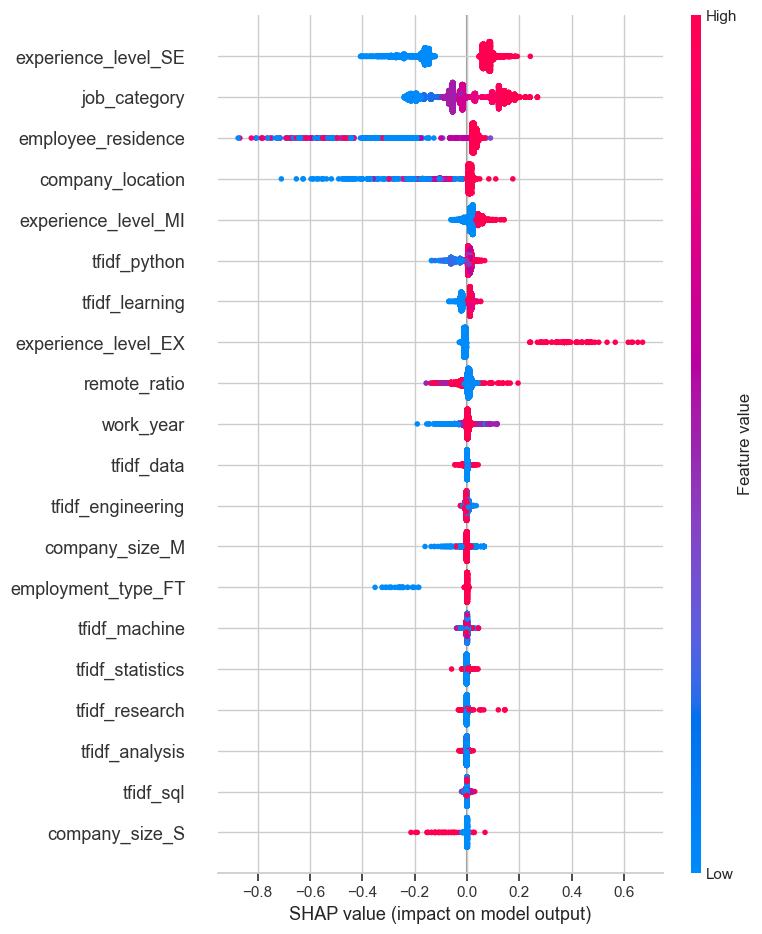

In [86]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, max_display=20)


Текущие результаты с использованием моделей **CatBoostRegressor** и **XGBoost Regressor** после фильтрации данных и трансформации целевой переменной выглядят следующим образом:

### Текущие Метрики:

1.  **CatBoostRegressor:**

    -   **MAE (Mean Absolute Error):** 46,249.84
    -   **RMSE (Root Mean Squared Error):** 61,806.83
    -   **R² (Coefficient of Determination):** 0.27
2.  **XGBoost Regressor (после трансформации целевой переменной):**

    -   **MAE:** 41,774.66
    -   **RMSE:** 53,468.59
    -   **R²:** 0.28

### Оценка Результатов:

1.  **R² = 0.27 и 0.28:**

    -   **Интерпретация:** Модели объясняют около 27-28% вариации целевой переменной (зарплаты).
2.  **MAE и RMSE:**

    -   **Значения:** Ошибки в диапазоне 41k--61k USD могут быть высокими или приемлемыми в зависимости от общего диапазона зарплат в наборе данных.

In [113]:
# Функция для расчёта MPE
def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0
    y_true = y_true[non_zero_indices]
    y_pred = y_pred[non_zero_indices]
    
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    return mpe

# Расчёт MPE
mpe = mean_percentage_error(y_test, y_pred_best)
print(f"MPE: {mpe:.2f}%")

MPE: -0.06%


In [114]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0
    y_true = y_true[non_zero_indices]
    y_pred = y_pred[non_zero_indices]
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Расчёт MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_best)
print(f"MAPE: {mape:.2f}%")


MAPE: 2.40%


Описание Метрик
---------------

### 1\. **Mean Percentage Error (MPE)**


-   **Интерпретация:**

    -   **Положительное значение MPE:** Модель **недооценивает** целевую переменную в среднем.
    -   **Отрицательное значение MPE:** Модель **переоценивает** целевую переменную в среднем.
    -   **MPE близкое к нулю:** Нет систематической ошибки; модель не склонна к переоценке или недооценке.

### 2\. **Mean Absolute Percentage Error (MAPE)**


-   **Интерпретация:**

    -   **MAPE показывает среднюю абсолютную величину ошибок в процентах.** Чем ниже значение MAPE, тем точнее модель в среднем предсказывает значения.
    -   **В отличие от MPE, MAPE всегда положителен,** так как берутся абсолютные значения ошибок.

Интерпретация Результатов
-------------------------------

### Метрики:

-   **MPE:** -0.06%
-   **MAPE:** 2.40%

### 1\. **MPE: -0.06%**

-   **Значение:** -0.06%
-   **Интерпретация:**
    -   **Смысл:** Модель **переоценивает** зарплаты в среднем на 0.06%.
    -   **Положение:** Это значение практически равно нулю, что означает отсутствие значимой систематической ошибки. Модель не склонна к систематической переоценке или недооценке целевой переменной.
    -   **Вывод:** Модель хорошо сбалансирована в отношении направления ошибок.

### 2\. **MAPE: 2.40%**

-   **Значение:** 2.40%
-   **Интерпретация:**
    -   **Смысл:** В среднем, предсказания модели отличаются от фактических значений на **2.40%**.
    -   **Положение:** Это низкое значение MAPE, указывающее на высокую точность модели.
    -   **Контекст:**
        -   **В контексте зарплат:** Если средняя зарплата, например, составляет 100,000 USD, то 2.40% составляет 2,400 USD. Это относительно небольшая ошибка, особенно если учесть, что модели предсказывают крупные денежные суммы.
        -   **Сравнение с другими метриками:**
            -   **MAE и RMSE:** Значения MAE (~41,775 USD) и RMSE (~53,469 USD) могут быть более понятны в контексте диапазона зарплат в наборе данных. Например, при средней зарплате 100,000 USD MAE составляет около 41.8% от средней зарплаты, что довольно высоко. Однако MAPE показывает, что в среднем ошибки предсказаний относительно небольшие.

### Возможные Объяснения:

-   **Систематические Ошибки:** Значения MPE близки к нулю, что указывает на отсутствие значимой систематической переоценки или недооценки модели.
-   **Точность Предсказаний:** Низкое значение MAPE говорит о высокой точности предсказаний модели в относительном выражении, даже если абсолютные ошибки (MAE и RMSE) могут быть значительными из-за масштаба целевой переменной.